In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from scipy.stats import norm  
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC, LinearSVC
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score
import lightgbm as lgbm
k_fold = KFold(n_splits=5)
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.model_selection import GroupShuffleSplit

In [2]:
import sklearn as sklearn

In [3]:
#Import the train data
train = pd.read_csv("/Users/bagusariyono/Downloads/training_set_VU_DM.csv")

In [44]:
#To see all columns
pd.set_option('display.max_columns', None)

In [45]:
pd.set_option('display.max_rows', None)

In [48]:
train.isnull().sum()

srch_id                                     0
date_time                                   0
site_id                                     0
visitor_location_country_id                 0
visitor_hist_starrating                     0
visitor_hist_adr_usd                        0
prop_country_id                             0
prop_id                                     0
prop_starrating                             0
prop_review_score                           0
prop_brand_bool                             0
prop_location_score1                        0
prop_location_score2                        0
prop_log_historical_price                   0
position                                    0
price_usd                                   0
promotion_flag                              0
srch_destination_id                         0
srch_length_of_stay                         0
srch_booking_window                         0
srch_adults_count                           0
srch_children_count               

In [ ]:
#imputing missing values

In [6]:
train=train.copy()

In [6]:
b = train.groupby('prop_starrating')['prop_review_score'].mean()

In [7]:
b

prop_starrating
0    3.053937
1    2.669327
2    3.227522
3    3.808300
4    4.021815
5    4.278138
Name: prop_review_score, dtype: float64

In [8]:
train.head(5)

srch_id            date_time  site_id  visitor_location_country_id  \
0        1  2013-04-04 08:32:15       12                          187   
1        1  2013-04-04 08:32:15       12                          187   
2        1  2013-04-04 08:32:15       12                          187   
3        1  2013-04-04 08:32:15       12                          187   
4        1  2013-04-04 08:32:15       12                          187   

   visitor_hist_starrating  visitor_hist_adr_usd  prop_country_id  prop_id  \
0                      NaN                   NaN              219      893   
1                      NaN                   NaN              219    10404   
2                      NaN                   NaN              219    21315   
3                      NaN                   NaN              219    27348   
4                      NaN                   NaN              219    29604   

   prop_starrating  prop_review_score  prop_brand_bool  prop_location_score1  \
0                3                3.5                1                  2.83   
1                4                4.0                1                  2.20   
2                3                4.5                1                  2.20   
3                2                4.0                1                  2.83   
4                4                3.5                1                  2.64   

   prop_location_score2  prop_log_historical_price  position  price_usd  \
0                0.0438                       4.95        27     104.77   
1                0.0149                       5.03        26     170.74   
2                0.0245                       4.92        21     179.80   
3                0.0125                       4.39        34     602.77   
4                0.1241                       4.93         4     143.58   

   promotion_flag  srch_destination_id  srch_length_of_stay  \
0               0                23246                    1   
1               0                23246                    1   
2               0                23246                    1   
3               0                23246                    1   
4               0                23246                    1   

   srch_booking_window  srch_adults_count  srch_children_count  \
0                    0                  4                    0   
1                    0                  4                    0   
2                    0                  4                    0   
3                    0                  4                    0   
4                    0                  4                    0   

   srch_room_count  srch_saturday_night_bool  srch_query_affinity_score  \
0                1                         1                        NaN   
1                1                         1                        NaN   
2                1                         1                        NaN   
3                1                         1                        NaN   
4                1                         1                        NaN   

   orig_destination_distance  random_bool  comp1_rate  comp1_inv  \
0                        NaN            1         NaN        NaN   
1                        NaN            1         NaN        NaN   
2                        NaN            1         NaN        NaN   
3                        NaN            1         NaN        NaN   
4                        NaN            1         NaN        NaN   

   comp1_rate_percent_diff  comp2_rate  comp2_inv  comp2_rate_percent_diff  \
0                      NaN         0.0        0.0                      NaN   
1                      NaN         NaN        NaN                      NaN   
2                      NaN         0.0        0.0                      NaN   
3                      NaN        -1.0        0.0                      5.0   
4                      NaN         0.0        0.0                      NaN   

   comp3_rate  comp3_inv  comp3_rate_percent_diff  comp4_r

In [10]:
c = train.groupby('prop_location_score1')['prop_location_score2'].mean()
c

prop_location_score1
0.00    0.031312
0.69    0.043457
1.10    0.048959
1.39    0.055100
1.61    0.063016
1.79    0.071435
1.95    0.076815
2.08    0.075659
2.20    0.085213
2.30    0.087404
2.40    0.095763
2.48    0.090967
2.56    0.096744
2.64    0.104932
2.71    0.099026
2.77    0.110568
2.83    0.104832
2.89    0.109688
2.94    0.112807
3.00    0.104798
3.04    0.107068
3.09    0.102581
3.14    0.128061
3.18    0.114506
3.22    0.125603
3.26    0.148686
3.30    0.113138
3.33    0.120144
3.37    0.098583
3.40    0.107531
3.43    0.128082
3.47    0.150189
3.50    0.138145
3.53    0.121899
3.56    0.111586
3.58    0.156150
3.61    0.138954
3.64    0.145058
3.66    0.168546
3.69    0.127012
3.71    0.149739
3.74    0.144485
3.76    0.124709
3.78    0.159507
3.81    0.144890
3.83    0.111158
3.85    0.132093
3.87    0.150448
3.89    0.148444
3.91    0.160576
3.93    0.148126
3.95    0.162397
3.97    0.150934
3.99    0.175199
4.01    0.149351
4.03    0.132845
4.04    0.150336
4.06    0.

In [9]:
# is it better to use -1 for review
train['prop_review_score']=train.groupby('prop_starrating')['prop_review_score'].transform(lambda x: x.fillna(x.mean()))
train['prop_location_score2']=train.groupby('prop_location_score1')['prop_location_score2'].transform(lambda x: x.fillna(x.mean()))

In [10]:
train['prop_review_score']= ((train['prop_review_score']*10**0+0.5)/10**0).apply(np.floor,1)

In [11]:
# there are some prop_location_score2 dont have group in score 1 then, imputed 2 remainder values with average
train['prop_location_score2'].fillna(value=train['prop_location_score2'].mean(), inplace=True)

In [12]:
train.visitor_hist_starrating.fillna(-1, inplace=True)
train.visitor_hist_adr_usd.fillna(-1, inplace=True)
train.gross_bookings_usd.fillna(-1, inplace=True)
train.srch_query_affinity_score.fillna(-1, inplace=True)
train.orig_destination_distance.fillna(0, inplace=True)

In [13]:
train[['comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate', 'comp7_inv',
       'comp7_rate_percent_diff', 'comp8_rate', 'comp8_inv',
       'comp8_rate_percent_diff']]=train[['comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate', 'comp7_inv',
       'comp7_rate_percent_diff', 'comp8_rate', 'comp8_inv',
       'comp8_rate_percent_diff']].fillna(-2)

In [14]:
# Create target features. booked is 5, clicked is 1
train['target']=0
train.loc[(train.click_bool==1)&(train.booking_bool==0) ,'target']=1
train.loc[train.booking_bool==1,'target']=5

In [855]:
# conditions = [
#     train['booking_bool'].eq(0) & train['click_bool'].eq(1),
#      train['booking_bool'].eq(1) & train['click_bool'].eq(1),
#      train['booking_bool'].eq(0) & train['click_bool'].eq(0),]
# choices = [1,2,0]
# train['book_click'] = np.select(conditions, choices, default=0)

In [16]:
### Feature creation

In [ ]:
#proxy for position

In [177]:
x_val['estpos']=str(x_val.positionsss)

<ipython-input-177-22b6b9d1821c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_val['estpos']=str(x_val.positionsss)


In [ ]:
#different value for the training and val

In [ ]:
x_try = x_val

In [307]:
train_pos = np.floor(x_train.groupby(['prop_id','srch_destination_id'])['position'].median()).to_dict()
x_try['estpost']=x_try.set_index(['prop_id', 'srch_destination_id']).index.map(train_pos.get)
x_val['estpost'] = x_val['estpost'].fillna('none')
# x_try['trial_target']=y_val
# x_try['booked']=0
# x_try.loc[x_try.trial_target==5,'booked']=1
# x_try['clicked']=0
# x_try.loc[x_try.trial_target==1,'clicked']=1

<ipython-input-307-920222941c25>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_try['estpost']=x_try.set_index(['prop_id', 'srch_destination_id']).index.map(train_pos.get)
<ipython-input-307-920222941c25>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_val['estpost'] = x_val['estpost'].fillna('none')


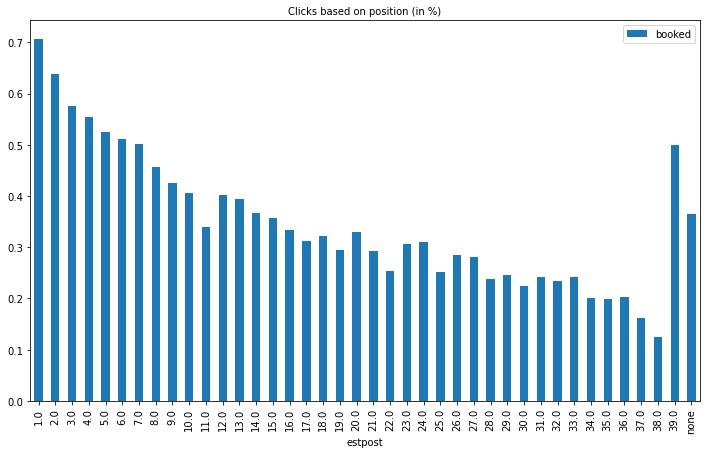

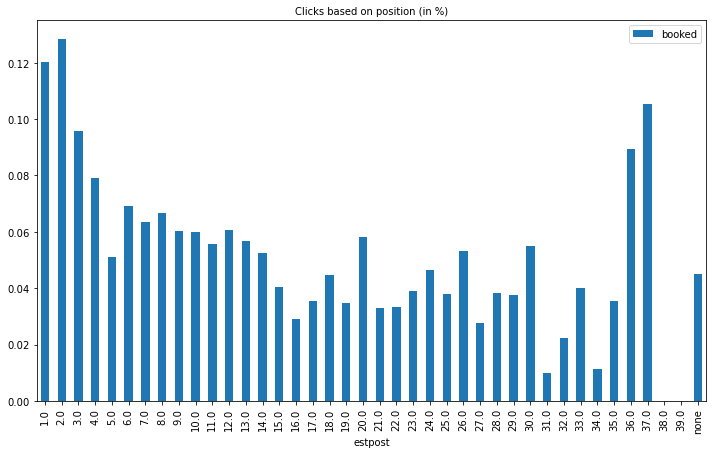

In [308]:
nonrandom = x_try[x_try.random_bool==0]
random = x_try[x_try.random_bool==1]
positions = (nonrandom['booked'].groupby(nonrandom['estpost']).mean()).to_frame()
ax = positions.plot.bar(figsize=(12,7))
ax.set_title("Clicks based on position (in %)", fontsize =10);

positions = (random['booked'].groupby(random['estpost']).mean()).to_frame()
ax = positions.plot.bar(figsize=(12,7))
ax.set_title("Clicks based on position (in %)", fontsize =10);

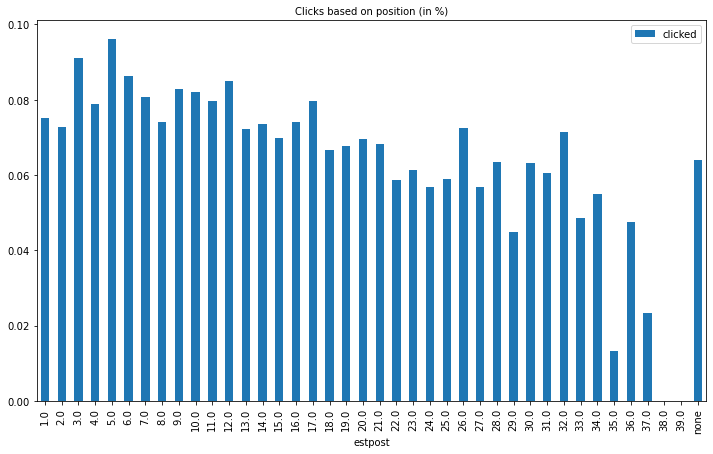

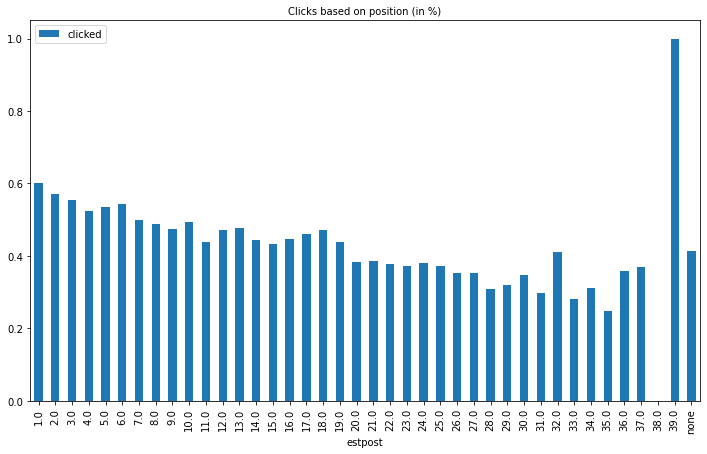

In [309]:
positions = (nonrandom['clicked'].groupby(nonrandom['estpost']).mean()).to_frame()
ax = positions.plot.bar(figsize=(12,7))
ax.set_title("Clicks based on position (in %)", fontsize =10);

positions = (random['clicked'].groupby(random['estpost']).mean()).to_frame()
ax = positions.plot.bar(figsize=(12,7))
ax.set_title("Clicks based on position (in %)", fontsize =10);

In [310]:
train_pos = np.floor(x_train.groupby(['prop_id','prop_country_id'])['position'].median()).to_dict()
x_try['estpost']=x_try.set_index(['prop_id','prop_country_id']).index.map(train_pos.get)
x_val['estpost'] = x_val['estpost'].fillna('none')

<ipython-input-310-09ca8aba7888>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_try['estpost']=x_try.set_index(['prop_id','prop_country_id']).index.map(train_pos.get)
<ipython-input-310-09ca8aba7888>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_val['estpost'] = x_val['estpost'].fillna('none')


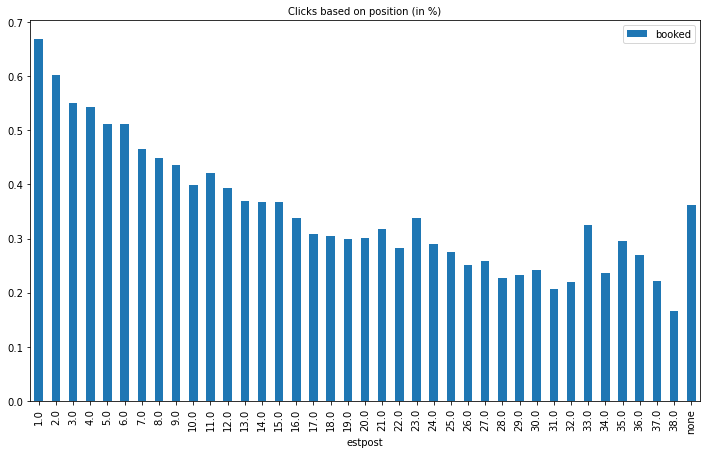

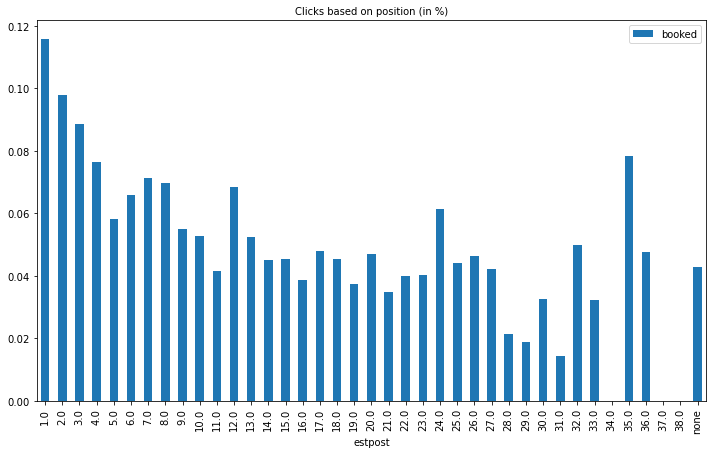

In [311]:
nonrandom = x_try[x_try.random_bool==0]
random = x_try[x_try.random_bool==1]
positions = (nonrandom['booked'].groupby(nonrandom['estpost']).mean()).to_frame()
ax = positions.plot.bar(figsize=(12,7))
ax.set_title("Clicks based on position (in %)", fontsize =10);

positions = (random['booked'].groupby(random['estpost']).mean()).to_frame()
ax = positions.plot.bar(figsize=(12,7))
ax.set_title("Clicks based on position (in %)", fontsize =10);

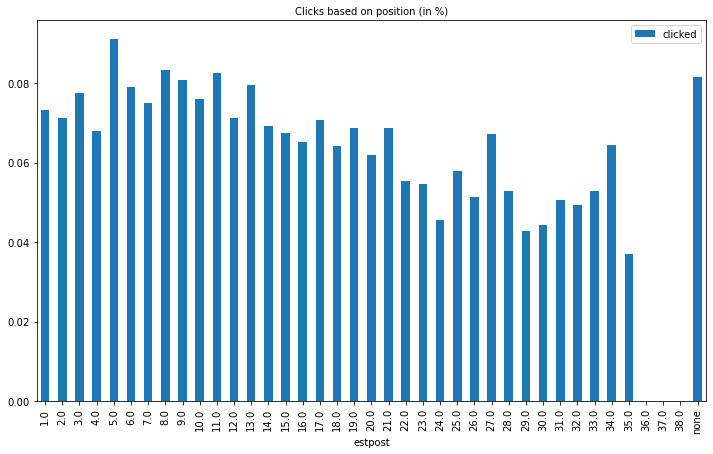

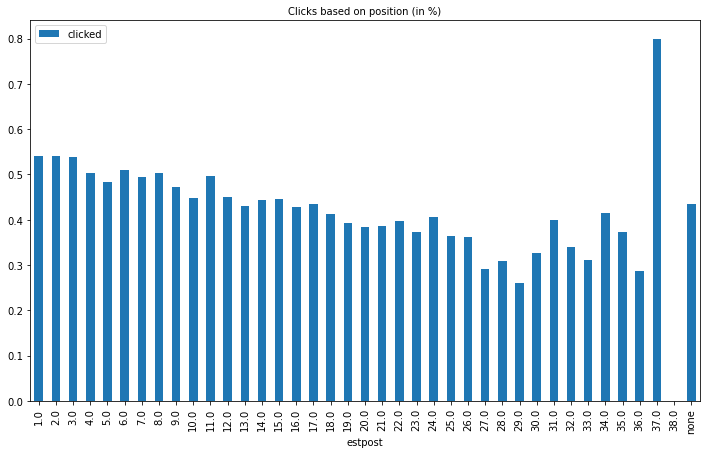

In [312]:
positions = (nonrandom['clicked'].groupby(nonrandom['estpost']).mean()).to_frame()
ax = positions.plot.bar(figsize=(12,7))
ax.set_title("Clicks based on position (in %)", fontsize =10);

positions = (random['clicked'].groupby(random['estpost']).mean()).to_frame()
ax = positions.plot.bar(figsize=(12,7))
ax.set_title("Clicks based on position (in %)", fontsize =10);

In [ ]:
#Booking based on position
position2 = (nonrandom['booking_bool'].groupby(nonrandom['position']).mean()).to_frame()
ax = position2.plot.bar(figsize=(12,7))
ax.set_title("Clicks based on position (in %)", fontsize =10);

In [136]:
nonrandom_book_position = (nonrandom['booked'].groupby(nonrandom['deleted']).mean()).to_frame()
#nonrandom_click_position = (nonrandom['clicked'].groupby(nonrandom['deleted']).mean()).to_frame()

fig = plt.figure()
#ax = fig.add_subplot()
width = 0.35
nonrandom_book_position.plot.bar( figsize=(20,5),width = width,ax=ax,rot=0,position=1,color= plt.cm.RdYlGn(np.linspace(0,10,10)))
#nonrandom_click_position.plot.bar( figsize=(20,5),width = width,ax=ax,rot=0,position=0,color='green')

ax.set_title("Clicked or booked hotel based on positions (in %)", fontsize =10);
plt.show()

<Figure size 432x288 with 0 Axes>

In [ ]:
a = train['price_usd'].groupby(train['srch_id']).mean().to_dict()
#Create new collumn to get the average price per start category, should remove it when used as feature since it is same as star rating
train['average_price_per_search']=train['srch_id'].map(a)

In [108]:
train.tail(5)

srch_id            date_time  site_id  visitor_location_country_id  \
4958342   332785  2013-06-30 19:55:18        5                          219   
4958343   332785  2013-06-30 19:55:18        5                          219   
4958344   332785  2013-06-30 19:55:18        5                          219   
4958345   332785  2013-06-30 19:55:18        5                          219   
4958346   332785  2013-06-30 19:55:18        5                          219   

         visitor_hist_starrating  visitor_hist_adr_usd  prop_country_id  \
4958342                     -1.0                  -1.0              219   
4958343                     -1.0                  -1.0              219   
4958344                     -1.0                  -1.0              219   
4958345                     -1.0                  -1.0              219   
4958346                     -1.0                  -1.0              219   

         prop_id  prop_starrating  prop_review_score  prop_brand_bool  \
4958342    77700                3                4.0                1   
4958343    88083                3                4.0                1   
4958344    94508                3                4.0                1   
4958345   128360                3                5.0                1   
4958346   134949                3                3.0                1   

         prop_location_score1  prop_location_score2  \
4958342                  1.61              0.047100   
4958343                  1.95              0.152000   
4958344                  1.10              0.016400   
4958345                  1.95              0.066200   
4958346                  1.10              0.048959   

         prop_log_historical_price  position  price_usd  promotion_flag  \
4958342                        0.0         2      118.0               0   
4958343                        0.0         3       89.0               0   
4958344                        0.0         4       99.0               0   
4958345                        0.0         1      139.0               0   
4958346                        0.0         6       61.0               0   

         srch_destination_id  srch_length_of_stay  srch_booking_window  \
4958342                16974                    1                   21   
4958343                16974                    1                   21   
4958344                16974                    1                   21   
4958345                16974                    1                   21   
4958346                16974                    1                   21   

         srch_adults_count  srch_children_count  srch_room_count  \
4958342                  3                    0                1   
4958343                  3                    0                1   
4958344                  3                    0                1   
4958345                  3                    0                1   
4958346                  3                    0                1   

         srch_saturday_night_bool  srch_query_affinity_score  \
4958342                         0                       -1.0   
4958343                         0                       -1.0   
4958344                         0                       -1.0   
4958345                         0                       -1.0   
4958346                         0                       -1.0   

         orig_destination_distance  random_bool  comp1_rate  comp1_inv  \
4958342                     550.92            0          -2         -2   
4958343                     553.14            0          -2         -2   
4958344                     544.43            0          -2         -2   
4958345                     550.38            0          -2         -2   
4958346                     583.25            0          -2         -2   

         comp1_rate_percent_diff  comp2_rate  comp2_inv  \
4958342                       -2          -2         -2   
4958343                       -2          -2         -2   
4

In [17]:
#1 Rank within search id

In [18]:
#intuition: cheaper, better star, better review

In [63]:
train['price_order']=train.groupby("srch_id")["price_usd"].rank('dense')

In [16]:
train['review_score_order']=train.groupby("srch_id")["prop_review_score"].rank('dense')

In [17]:
train['loc1_order']=train.groupby("srch_id")["prop_location_score1"].rank('dense')

In [18]:
train['loc2_order']=train.groupby("srch_id")["prop_location_score2"].rank('dense')

In [19]:
train['orig_dest_dist_order']=train.groupby("srch_id")["orig_destination_distance"].rank('dense')

In [20]:
train['prop_starrating']=train.groupby("srch_id")["prop_starrating"].rank('dense')

In [23]:
#2 Compare within search id 

In [21]:
#
#difference of price hotel from average in search
a = train['price_usd'].groupby(train['srch_id']).mean().to_dict()
#Create new collumn to get the average price per start category, should remove it when used as feature since it is same as star rating
train['average_price_per_search']=train['srch_id'].map(a)
# keep it
train['diff_average_price_per_search'] = train['price_usd']-train['average_price_per_search']

In [22]:
#difference of review from average in search
a = train['prop_review_score'].groupby(train['srch_id']).mean().to_dict()
#Create new collumn to get the average price per start category, should remove it when used as feature since it is same as star rating
train['average_prop_review_score']=train['srch_id'].map(a)
# keep it
train['diff_average_prop_review_score'] = train['prop_review_score']-train['average_prop_review_score']

In [23]:
#difference of starrating from average in search
a = train['prop_starrating'].groupby(train['srch_id']).mean().to_dict()
#Create new collumn to get the average price per start category, should remove it when used as feature since it is same as star rating
train['average_prop_starrating']=train['srch_id'].map(a)
# keep it
train['diff_average_prop_starrating'] = train['prop_starrating']-train['average_prop_starrating']

In [24]:
#difference of starrating from location in search
a = train['prop_location_score1'].groupby(train['srch_id']).mean().to_dict()
#Create new collumn to get the average price per start category, should remove it when used as feature since it is same as star rating
train['average_prop_location_score1']=train['srch_id'].map(a)
# keep it
train['diff_average_prop_location_score1'] = train['prop_location_score1']-train['average_prop_location_score1']

In [28]:
train['perc_diff_average_price_per_search'] = (train['diff_average_price_per_search']/train['average_price_per_search'])*100
train['perc_diff_average_prop_review_score'] = (train['diff_average_prop_review_score']/train['average_prop_review_score'])*100
train['perc_diff_average_prop_starrating']=(train['diff_average_prop_starrating']/train['average_prop_starrating'])*100
train['perc_diff_average_prop_location_score1']=(train['diff_average_prop_location_score1']/train['average_prop_location_score1'])*100

In [28]:
#Compare with similar hotel

In [25]:
#
#difference of price hotel from average price per star
a = train['price_usd'].groupby(train['prop_starrating']).mean().to_dict()
#Create new collumn to get the average price per start category, should remove it when used as feature since it is same as star rating
train['average_price_per_star']=train['prop_starrating'].map(a)
# keep it
train['diff_average_price_per_star'] = train['price_usd']-train['average_price_per_star']

In [26]:
#difference of price hotel from average price per review
a = train['price_usd'].groupby(train['prop_review_score']).mean().to_dict()
#Create new collumn to get the average price per start category, should remove it when used as feature since it is same as star rating
train['average_price_per_reviewscore']=train['prop_review_score'].map(a)
# keep it
train['diff_average_price_per_reviewscore'] = train['price_usd']-train['average_price_per_reviewscore']

In [27]:
#difference of price hotel from average price per review
a = train['price_usd'].groupby(train['prop_country_id']).mean().to_dict()
#Create new collumn to get the average price per start category, should remove it when used as feature since it is same as star rating
train['average_price_per_countryid']=train['prop_country_id'].map(a)
# keep it
train['diff_average_price_per_countryid'] = train['price_usd']-train['average_price_per_countryid']

In [29]:
#different in percentage
train['perc_diff_average_price_per_star'] = (train['diff_average_price_per_star']/train['average_price_per_star'])*100
train['perc_diff_average_price_reviewscore'] = (train['diff_average_price_per_reviewscore']/train['average_price_per_reviewscore'])*100
train['perc_diff_average_price_per_countryid']=(train['diff_average_price_per_countryid']/train['average_price_per_countryid'])*100

In [ ]:
#Other features

In [30]:
#1
#in the same location
train['sameloc']=0
# If the property and user have the same country id the value is 1
train.loc[train.prop_country_id==train.visitor_location_country_id,'sameloc']=1

In [280]:
train['hist_price_diff']=train.visitor_hist_adr_usd  - train.price_usd
train['hist_star_diff']=train.visitor_hist_starrating  - train.prop_starrating 

In [286]:
train.isnull().sum()

srch_id                                     0
date_time                                   0
site_id                                     0
visitor_location_country_id                 0
visitor_hist_starrating                     0
visitor_hist_adr_usd                        0
prop_country_id                             0
prop_id                                     0
prop_starrating                             0
prop_review_score                           0
prop_brand_bool                             0
prop_location_score1                        0
prop_location_score2                        0
prop_log_historical_price                   0
position                                    0
price_usd                                   0
promotion_flag                              0
srch_destination_id                         0
srch_length_of_stay                         0
srch_booking_window                         0
srch_adults_count                           0
srch_children_count               

In [ ]:
###Selected features

In [95]:
selected =['position','srch_id', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool','price_order', 'review_score_order',
       'loc1_order', 'loc2_order', 'average_price_per_star',
       'diff_average_price_per_star', 'average_price_per_reviewscore',
       'diff_average_price_per_reviewscore', 'average_price_per_countryid',
       'diff_average_price_per_countryid', 'average_price_per_search',
       'diff_average_price_per_search', 'average_prop_review_score',
       'diff_average_prop_review_score', 'average_prop_starrating',
       'diff_average_prop_starrating', 'average_prop_location_score1',
       'diff_average_prop_location_score1', 'sameloc','comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate', 'comp7_inv',
       'comp7_rate_percent_diff', 'comp8_rate', 'comp8_inv',
       'comp8_rate_percent_diff',  'perc_diff_average_price_per_search',
       'perc_diff_average_prop_review_score',
       'perc_diff_average_prop_starrating',
       'perc_diff_average_prop_location_score1',
       'perc_diff_average_price_per_star',
       'perc_diff_average_price_reviewscore',
       'perc_diff_average_price_per_countryid']
train_df_features = train.loc[:,selected]

In [ ]:
# try diff features

In [281]:
selected =['position','srch_id', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id','prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool','price_order', 'review_score_order',
       'loc1_order', 'loc2_order',
       'diff_average_price_per_star',
       'diff_average_price_per_reviewscore',
       'diff_average_price_per_countryid',
       'diff_average_price_per_search',
       'diff_average_prop_review_score',
       'diff_average_prop_starrating',
       'diff_average_prop_location_score1','comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate', 'comp7_inv',
       'comp7_rate_percent_diff', 'comp8_rate', 'comp8_inv','hist_price_diff','hist_star_diff']

In [282]:
len(selected)

61

In [283]:
target=['target','srch_id']

In [ ]:
### SETUP the DATASET

In [ ]:
#use part of dataset only first 10.000 srch_id

In [84]:
np.random.seed(0)

In [287]:
sampled_queries = np.random.choice(train["srch_id"].unique(), 10000)
sampled_train = train.groupby('srch_id').filter(lambda x: x["srch_id"].values[0] in sampled_queries)
sampled_train ["srch_id"].nunique()

9786

In [288]:
len(sampled_train)

242829

In [289]:
sampled_train.srch_id.nunique()

9786

In [203]:
arr = train.srch_id.unique()
n = 1
choice = np.random.choice(arr,round(len(arr)*n),replace=False)
sampled_train = train.loc[choice]

In [204]:
len(arr)*0.5

99897.5

In [205]:
len(sampled_train)

199795

In [206]:
sampled_train.srch_id.nunique()

13373

In [193]:
df_sample.head(5)

srch_id            date_time  site_id  visitor_location_country_id  \
36848      2482  2013-02-16 12:46:37        5                          219   
251639    16847  2013-05-25 07:25:08        5                          219   
239599    16060  2013-04-21 06:38:50        5                          219   
11735       843  2013-05-27 11:10:37        5                          100   
25529      1726  2013-01-17 15:12:57       24                          216   

        visitor_hist_starrating  visitor_hist_adr_usd  prop_country_id  \
36848                      -1.0                  -1.0              219   
251639                     -1.0                  -1.0              219   
239599                     -1.0                  -1.0              219   
11735                      -1.0                  -1.0              219   
25529                      -1.0                  -1.0              219   

        prop_id  prop_starrating  prop_review_score  prop_brand_bool  \
36848    138210              2.0                5.0                1   
251639   117788              4.0                5.0                1   
239599   129563              2.0                4.0                1   
11735     13760              3.0                5.0                1   
25529     21043              3.0                4.0                0   

        prop_location_score1  prop_location_score2  prop_log_historical_price  \
36848                   1.61              0.000700                       4.77   
251639                  3.09              0.102581                       5.58   
239599                  3.09              0.102581                       3.87   
11735                   4.26              0.186500                       5.48   
25529                   2.64              0.041400                       5.47   

        position  price_usd  promotion_flag  srch_destination_id  \
36848         25     156.00               0                13216   
251639        15     139.00               0                25364   
239599        29      50.00               0                11228   
11735         22     130.00               0                 7714   
25529         12     169.46               0                24002   

        srch_length_of_stay  srch_booking_window  srch_adults_count  \
36848                     4                   42                  2   
251639                    3                   46                  2   
239599                    2                  145                  3   
11735                     2                    0                  3   
25529                     3                   22                  1   

        srch_children_count  srch_room_count  srch_saturday_night_bool  \
36848                     1                1                         1   
251639                    0                1                         0   
239599                    0                1                         1   
11735                     0                1                         0   
25529                     0                1                         1   

        srch_query_affinity_score  orig_destination_distance  random_bool  \
36848                        -1.0                     533.18            1   
251639                       -1.0                     123.44            1   
239599                       -1.0                     115.77            1   
11735                        -1.0                     121.05            0   
25529                        -1.0                       0.00            0   

        comp1_rate  comp1_inv  comp1_rate_percent_diff  comp2_rate  comp2_inv  \
36848         -2.0       -2.0                     -2.0        -2.0        1.0   
251639        -2.0       -2.0                     -2.0        -2.0       -2.0   
239599        -2.0       -2.0                     -2.0        -2.0       -2.0   
11735         -2.0       -2.0                     -2.0        -2.0       -2.0   
25529         -2.0       

In [290]:
x = sampled_train.loc[:,selected]
y = sampled_train.loc[:,target]

In [291]:
gss = GroupShuffleSplit(n_splits=1, train_size=.8, random_state=8)
gss.get_n_splits()
for train_idx, val_idx in gss.split(x, y, x.srch_id):
     print("TRAIN:", train_idx, "VALIDATION:", val_idx)

TRAIN: [     0      1      2 ... 242826 242827 242828] VALIDATION: [    32     33     34 ... 242755 242756 242757]


In [292]:
x_train = x[x['srch_id'].isin(train_idx)]
y_train = y[y['srch_id'].isin(train_idx)]
x_val = x[x['srch_id'].isin(val_idx)]
y_val = y[y['srch_id'].isin(val_idx)]

In [293]:
y_train = y_train.drop(columns='srch_id')
y_val = y_val.drop(columns='srch_id')

In [294]:
gbm = lgbm.LGBMRanker(objective='lambdarank')

In [295]:
groups = x_train["srch_id"].value_counts(sort=False).sort_index()
eval_groups = x_val["srch_id"].value_counts(sort=False).sort_index()

In [102]:
#before parameter tuning

In [296]:
gbm.fit(x_train,y_train,group=groups,eval_set=[(x_train,y_train),(x_val,y_val)],eval_group=[groups, eval_groups],eval_at=5)

[1]	training's ndcg@5: 0.374295	valid_1's ndcg@5: 0.350655
[2]	training's ndcg@5: 0.399693	valid_1's ndcg@5: 0.368502
[3]	training's ndcg@5: 0.409047	valid_1's ndcg@5: 0.382052
[4]	training's ndcg@5: 0.416299	valid_1's ndcg@5: 0.389187
[5]	training's ndcg@5: 0.422926	valid_1's ndcg@5: 0.385784
[6]	training's ndcg@5: 0.426621	valid_1's ndcg@5: 0.389068
[7]	training's ndcg@5: 0.430376	valid_1's ndcg@5: 0.391008
[8]	training's ndcg@5: 0.434121	valid_1's ndcg@5: 0.390991
[9]	training's ndcg@5: 0.438561	valid_1's ndcg@5: 0.39126
[10]	training's ndcg@5: 0.440056	valid_1's ndcg@5: 0.394069
[11]	training's ndcg@5: 0.442005	valid_1's ndcg@5: 0.393667
[12]	training's ndcg@5: 0.445525	valid_1's ndcg@5: 0.394719
[13]	training's ndcg@5: 0.448785	valid_1's ndcg@5: 0.397163
[14]	training's ndcg@5: 0.450955	valid_1's ndcg@5: 0.397191
[15]	training's ndcg@5: 0.451838	valid_1's ndcg@5: 0.395702
[16]	training's ndcg@5: 0.454478	valid_1's ndcg@5: 0.397981
[17]	training's ndcg@5: 0.457019	valid_1's ndcg@5:

LGBMRanker(objective='lambdarank')

In [297]:
gbm.best_score_

defaultdict(collections.OrderedDict,
            {'training': OrderedDict([('ndcg@5', 0.5905778432013004)]),
             'valid_1': OrderedDict([('ndcg@5', 0.4082079478957128)])})

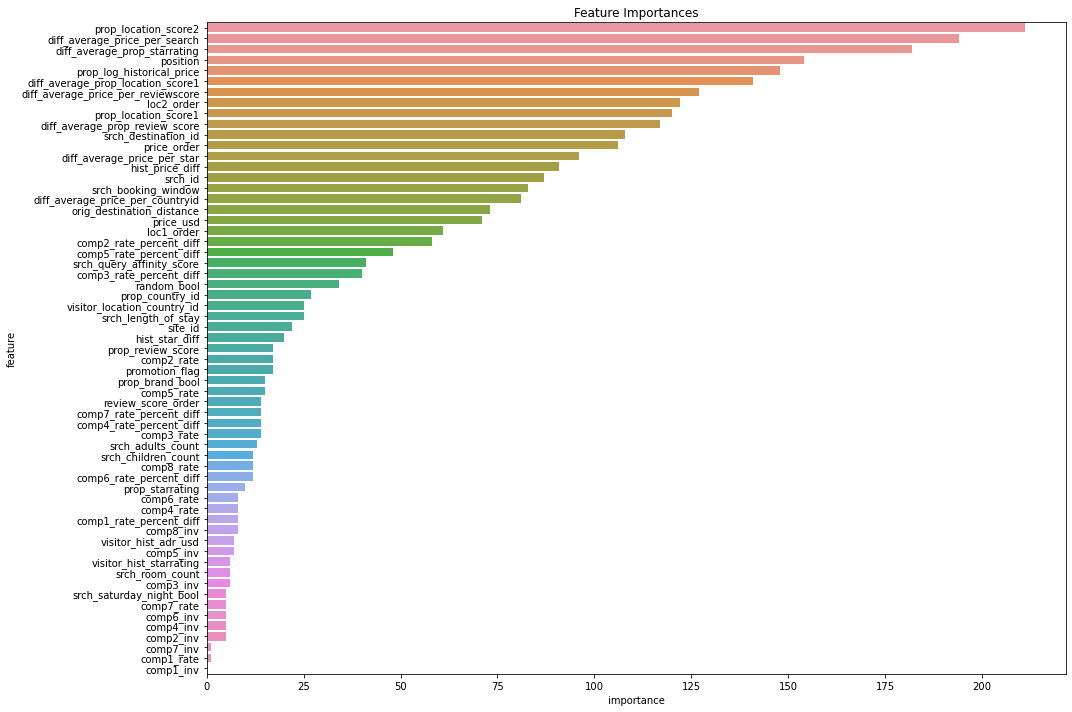

In [298]:
feature_imp = pd.DataFrame(sorted(zip(gbm.feature_importances_,selected)), columns=['importance','feature'])

plt.figure(figsize=(15, 10))
sns.barplot(x="importance", y="feature", data=feature_imp.sort_values(by="importance", ascending=False))
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

In [989]:
# learning_rate = np.arange(0,2,0.01)
# num_leaves=np.arange(1,10)
# max_depth= np.arange(1,10 )
# n_estimators= np.arange(500,3000,500)
# max_bin=np.arange(50,200,25)

In [145]:
from sklearn.metrics import ndcg_score

In [146]:
from sklearn.metrics import make_scorer

In [147]:
ndcg_scorer = make_scorer(ndcg_score, needs_proba=True, k=5)

In [6]:
learning_rate = [0.01,0.02,0.03]
num_leaves=[4,8,16,32]
max_depth= [2,3,4,5]
n_estimators= [100,200,300,400]
max_bin=[50,100,150,200]

In [75]:
learning_rate = np.arange(0,2,0.01)
num_leaves=np.arange(1,10)
max_depth= np.arange(1, 10)
n_estimators= np.arange(500,3000,500)
max_bin=np.arange(50,500,50)

In [321]:
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

In [7]:
ranking_param_grid = {'num_leaves':num_leaves}

gridsearch = GridSearchCV(gbm,param_grid=ranking_param_grid,n_jobs=-1,cv=5,scoring=ndcg_scorer)

NameError: name 'gbm' is not defined

In [320]:
ranking_param_grid = {

    'learning_rate': learning_rate,
   'n_estimators': n_estimators,
     'num_leaves':num_leaves,
    'max_depth': max_depth,
    'max_bin':max_bin


gridsearch = GridSearchCV(gbm,param_distributions=ranking_param_grid,n_jobs=-1,cv=5,scoring=ndcg_scorer)

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (<ipython-input-320-63f8fa318251>, line 10)

In [319]:
print(dir(grid))

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_is_fitted', '_check_n_features', '_check_refit_for_multimetric', '_estimator_type', '_format_results', '_get_param_names', '_get_tags', '_more_tags', '_pairwise', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_required_parameters', '_run_search', '_validate_data', 'classes_', 'cv', 'decision_function', 'error_score', 'estimator', 'fit', 'get_params', 'inverse_transform', 'n_features_in_', 'n_iter', 'n_jobs', 'param_distributions', 'pre_dispatch', 'predict', 'predict_log_proba', 'predict_proba', 'random_state', 'refit', 'return_train_score', 'score', 'score_sampl

In [311]:
param_grid = {
     'num_leaves':num_leaves
}

gridsearch = GridSearchCV(gbm,param_grid,n_jobs=-1,cv=5,scoring=ndcg_scorer)

In [164]:
from sklearn.model_selection import RandomizedSearchCV

In [315]:
grid = RandomizedSearchCV(gbm,param_distributions=param_grid,n_jobs=-1,scoring=ndcg_scorer)

In [328]:
y_val.head(4)

target
856       0
857       0
858       0
859       0

In [324]:
grid.fit(x_train,y_train,group=groups,eval_set=[(x_train,y_train),(x_val,y_val)],eval_group=[groups, eval_groups],eval_at=5)

NotFittedError: All estimators failed to fit

In [306]:
import inspect

In [309]:
print(dir(grid))

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_is_fitted', '_check_n_features', '_check_refit_for_multimetric', '_estimator_type', '_format_results', '_get_param_names', '_get_tags', '_more_tags', '_pairwise', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_required_parameters', '_run_search', '_validate_data', 'classes_', 'cv', 'decision_function', 'error_score', 'estimator', 'fit', 'get_params', 'inverse_transform', 'n_features_in_', 'n_jobs', 'param_grid', 'pre_dispatch', 'predict', 'predict_log_proba', 'predict_proba', 'refit', 'return_train_score', 'score', 'score_samples', 'scoring', 'set_params', 'tran

In [308]:
print(inspect.signature(grid))

TypeError: GridSearchCV(estimator=LGBMRanker(objective='lambdarank'),
             param_grid={'num_leaves': [2, 4]},
             scoring=make_scorer(ndcg_score, needs_proba=True, k=5)) is not a callable object

In [4]:
x_train.head(5)

NameError: name 'x_train' is not defined

In [303]:
param = {
     'num_leaves':[20]
}

gridsearch = GridSearchCV(gbm,param,n_jobs=-1,scoring=ndcg_scorer)

In [304]:
gridsearch.fit(x_train,y_train,group=groups,eval_set=[(x_train,y_train),(x_val,y_val)],eval_group=[groups, eval_groups],eval_at=5)

NotFittedError: All estimators failed to fit

In [266]:
trial_gbm = lgbm.LGBMRanker(objective='lambdarank',metric='ndcg',learning_rate=0.2, n_estimators=100,max_depth=4,num_leaves=16)

In [267]:
trial_gbm.fit(x_train,y_train,group=groups,eval_set=[(x_train,y_train),(x_val,y_val)],eval_group=[groups, eval_groups],eval_at=5)

[1]	training's ndcg@5: 0.365524	valid_1's ndcg@5: 0.358662
[2]	training's ndcg@5: 0.383153	valid_1's ndcg@5: 0.379425
[3]	training's ndcg@5: 0.389536	valid_1's ndcg@5: 0.38487
[4]	training's ndcg@5: 0.3969	valid_1's ndcg@5: 0.391441
[5]	training's ndcg@5: 0.401444	valid_1's ndcg@5: 0.392515
[6]	training's ndcg@5: 0.403736	valid_1's ndcg@5: 0.394301
[7]	training's ndcg@5: 0.407566	valid_1's ndcg@5: 0.39455
[8]	training's ndcg@5: 0.409386	valid_1's ndcg@5: 0.397206
[9]	training's ndcg@5: 0.413172	valid_1's ndcg@5: 0.398028
[10]	training's ndcg@5: 0.417648	valid_1's ndcg@5: 0.397793
[11]	training's ndcg@5: 0.420874	valid_1's ndcg@5: 0.398142
[12]	training's ndcg@5: 0.4241	valid_1's ndcg@5: 0.401889
[13]	training's ndcg@5: 0.423634	valid_1's ndcg@5: 0.402925
[14]	training's ndcg@5: 0.426425	valid_1's ndcg@5: 0.406395
[15]	training's ndcg@5: 0.428106	valid_1's ndcg@5: 0.403303
[16]	training's ndcg@5: 0.43046	valid_1's ndcg@5: 0.408098
[17]	training's ndcg@5: 0.433558	valid_1's ndcg@5: 0.407

LGBMRanker(learning_rate=0.2, max_depth=4, metric='ndcg', num_leaves=16,
           objective='lambdarank')

In [837]:
from imblearn.under_sampling import RandomUnderSampler 

In [847]:
len(train[train.target==1])

83489

In [848]:
len(train[train.target==0])

4736468

In [849]:
len(train[train.target==5])

138390

In [886]:
target=['target']

In [907]:
initial_x = train.loc[:,selected]
initial_y = train.loc[:,target]

In [908]:
initial_x.head(3)

position  srch_id  site_id  visitor_location_country_id  \
0        27        1       12                          187   
1        26        1       12                          187   
2        21        1       12                          187   

   visitor_hist_starrating  visitor_hist_adr_usd  prop_country_id  prop_id  \
0                     -1.0                  -1.0              219      893   
1                     -1.0                  -1.0              219    10404   
2                     -1.0                  -1.0              219    21315   

   prop_starrating  prop_review_score  prop_brand_bool  prop_location_score1  \
0                3                4.0                1                  2.83   
1                4                4.0                1                  2.20   
2                3                5.0                1                  2.20   

   prop_location_score2  prop_log_historical_price  price_usd  promotion_flag  \
0                0.0438                       4.95     104.77               0   
1                0.0149                       5.03     170.74               0   
2                0.0245                       4.92     179.80               0   

   srch_destination_id  srch_length_of_stay  srch_booking_window  \
0                23246                    1                    0   
1                23246                    1                    0   
2                23246                    1                    0   

   srch_adults_count  srch_children_count  srch_room_count  \
0                  4                    0                1   
1                  4                    0                1   
2                  4                    0                1   

   srch_saturday_night_bool  srch_query_affinity_score  \
0                         1                       -1.0   
1                         1                       -1.0   
2                         1                       -1.0   

   orig_destination_distance  random_bool  price_order  review_score_order  \
0                        0.0            1          3.0                 3.0   
1                        0.0            1         14.0                 3.0   
2                        0.0            1         15.0                 4.0   

   loc1_order  loc2_order  average_price_per_star  \
0        13.0        17.0              182.406453   
1         6.0         8.0              307.842266   
2         6.0        13.0              182.406453   

   diff_average_price_per_star  average_price_per_reviewscore  \
0                   -77.636453                     217.676345   
1                  -137.102266                     217.676345   
2                    -2.606453                     329.617535   

   diff_average_price_per_reviewscore  average_price_per_countryid  \
0                         -112.906345                    198.16486   
1                          -46.936345                    198.16486   
2                         -149.817535                    198.16486   

   diff_average_price_per_countryid  average_price_per_search  \
0                         -93.39486                163.718929   
1                         -27.42486                163.718929   
2                         -18.36486                163.718929   

   diff_average_price_per_search  average_prop_review_score  \
0                     -58.948929                       3.75   
1                       7.021071                       3.75   
2                      16.081071                       3.75   

   diff_average_prop_review_score  average_prop_starrating  \
0                            0.25                 3.071429   
1                            0.25                 3.071429   
2                            1.25                 3.071429   

   diff_average_prop_starrating  average_prop_location_score1  \
0                     -0.071429                      2.299643   
1                      0.928571                      2.299643   
2             

In [909]:
initial_y.head(5)

target
0       0
1       0
2       0
3       0
4       0

In [910]:
rus = RandomUnderSampler(sampling_strategy={0: 2*221879, 1: 83489,5:138390})
x,y = rus.fit_resample(initial_x, initial_y)

In [ ]:
selected =['position','srch_id', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool','price_order', 'review_score_order',
       'loc1_order', 'loc2_order', 'average_price_per_star',
       'diff_average_price_per_star', 'average_price_per_reviewscore',
       'diff_average_price_per_reviewscore', 'average_price_per_countryid',
       'diff_average_price_per_countryid', 'average_price_per_search',
       'diff_average_price_per_search', 'average_prop_review_score',
       'diff_average_prop_review_score', 'average_prop_starrating',
       'diff_average_prop_starrating', 'average_prop_location_score1',
       'diff_average_prop_location_score1', 'sameloc','comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate', 'comp7_inv',
       'comp7_rate_percent_diff', 'comp8_rate', 'comp8_inv',
       'comp8_rate_percent_diff','target']
train_df_features = train.loc[:,selected]

In [912]:
gss = GroupShuffleSplit(n_splits=1, train_size=.8, random_state=8)
gss.get_n_splits()
for train_idx, val_idx in gss.split(x, y, x.srch_id):
     print("TRAIN:", train_idx, "VALIDATION:", val_idx)

TRAIN: 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[     7     10     19     20     27     36     42     44     48     54
     67     72     73     82     84     85     91     97     98     99
    101    102    103    112    113    121    129    135    140    141
    150    155    160    164    170    173    179    181    185    186
    190    191    192    198    199    209    211    216    218    223
    227    229    237    238    255    257    266    267    272    276
    284    289    296    300    301    302    308    310    312    314
    320    322    324    333    335    337    340    341    345    347
    354    358    364    365    377    379    383    392    399    400
    401    411    417    419    427    429    430    431    438    444
    458    462    472    473    474    476    480    483    491    493
    496    497    506    507    508    516    523    536    540    541
    545    554    558    561    562    577    579    580    593    594
    606    612    627    628    630    638    648    649    654    656
    66

In [916]:
x_train = x[x['srch_id'].isin(train_idx)]
#y_train = y[y['srch_id'].isin(train_idx)]
x_val = x[x['srch_id'].isin(val_idx)]
#y_val = y[y['srch_id'].isin(val_idx)]

In [917]:
y_train = x_train.loc[:,target]
x_train =x_train.drop(columns='target')

In [923]:
y_val = x_val.loc[:,target]
x_val =x_val.drop(columns='target')

In [924]:
groups = x_train["srch_id"].value_counts(sort=False).sort_index()
eval_groups = x_val["srch_id"].value_counts(sort=False).sort_index()

In [208]:
target_name = 'target'

train_sr_targets = train.loc[:,target_name]

In [927]:
gbm = lgbm.LGBMRanker(objective='lambdarank',metric='ndcg')

In [928]:
gbm.fit(x_train,y_train,group=groups,eval_set=[(x_train,y_train),(x_val,y_val)],eval_group=[groups, eval_groups],eval_at=5,verbose=20)

[20]	training's ndcg@5: 1	valid_1's ndcg@5: 0.999977
[40]	training's ndcg@5: 1	valid_1's ndcg@5: 0.999977
[60]	training's ndcg@5: 1	valid_1's ndcg@5: 0.999977
[80]	training's ndcg@5: 1	valid_1's ndcg@5: 0.999977
[100]	training's ndcg@5: 1	valid_1's ndcg@5: 0.999977


LGBMRanker(metric='ndcg', objective='lambdarank')

In [209]:
x = train_df_features
y = train_sr_targets

In [99]:
### try classifier

In [51]:
#Resample the data

In [111]:
train.head(200)

srch_id            date_time  site_id  visitor_location_country_id  \
0          1  2013-04-04 08:32:15       12                          187   
1          1  2013-04-04 08:32:15       12                          187   
2          1  2013-04-04 08:32:15       12                          187   
3          1  2013-04-04 08:32:15       12                          187   
4          1  2013-04-04 08:32:15       12                          187   
5          1  2013-04-04 08:32:15       12                          187   
6          1  2013-04-04 08:32:15       12                          187   
7          1  2013-04-04 08:32:15       12                          187   
8          1  2013-04-04 08:32:15       12                          187   
9          1  2013-04-04 08:32:15       12                          187   
10         1  2013-04-04 08:32:15       12                          187   
11         1  2013-04-04 08:32:15       12                          187   
12         1  2013-04-04 08:32:15       12                          187   
13         1  2013-04-04 08:32:15       12                          187   
14         1  2013-04-04 08:32:15       12                          187   
15         1  2013-04-04 08:32:15       12                          187   
16         1  2013-04-04 08:32:15       12                          187   
17         1  2013-04-04 08:32:15       12                          187   
18         1  2013-04-04 08:32:15       12                          187   
19         1  2013-04-04 08:32:15       12                          187   
20         1  2013-04-04 08:32:15       12                          187   
21         1  2013-04-04 08:32:15       12                          187   
22         1  2013-04-04 08:32:15       12                          187   
23         1  2013-04-04 08:32:15       12                          187   
24         1  2013-04-04 08:32:15       12                          187   
25         1  2013-04-04 08:32:15       12                          187   
26         1  2013-04-04 08:32:15       12                          187   
27         1  2013-04-04 08:32:15       12                          187   
28         4  2012-12-31 08:59:22        5                          219   
29         4  2012-12-31 08:59:22        5                          219   
30         4  2012-12-31 08:59:22        5                          219   
31         4  2012-12-31 08:59:22        5                          219   
32         4  2012-12-31 08:59:22        5                          219   
33         4  2012-12-31 08:59:22        5                          219   
34         4  2012-12-31 08:59:22        5                          219   
35         4  2012-12-31 08:59:22        5                          219   
36         4  2012-12-31 08:59:22        5                          219   
37         4  2012-12-31 08:59:22        5                          219   
38         4  2012-12-31 08:59:22        5                          219   
39         4  2012-12-31 08:59:22        5                          219   
40         4  2012-12-31 08:59:22        5                          219   
41         4  2012-12-31 08:59:22        5                          219   
42         4  2012-12-31 08:59:22        5                          219   
43         4  2012-12-31 08:59:22        5                          219   
44         4  2012-12-31 08:59:22        5                          219   
45         4  2012-12-31 08:59:22        5                          219   
46         4  2012-12-31 08:59:22        5                          219   
47         4  2012-12-31 08:59:22        5                          219   
48         4  2012-12-31 08:59:22        5                          219   
49         4  2012-12-31 08:59:22        5                          219   
50         4  2012-12-31 08:59:22        5                          219   
51         4  2012-12-31 08:59:22        5                          219   
52         4  2012-12-31 08:59

In [64]:
len(train[train.target==0])

4736468

In [65]:
len(train[train.target==1])

83489

In [66]:
len(train[train.target==5])

138390

In [211]:
rus = RandomUnderSampler(sampling_strategy={0: 221879, 1: 83489,5:138390})
x_rus, y_rus = rus.fit_resample(x, y)

In [314]:
from sklearn.utils import resample

In [316]:
train_sample_df = resample(train, n_samples=200000, random_state=8)

In [78]:
train.head(3)

srch_id            date_time  site_id  visitor_location_country_id  \
0        1  2013-04-04 08:32:15       12                          187   
1        1  2013-04-04 08:32:15       12                          187   
2        1  2013-04-04 08:32:15       12                          187   

   visitor_hist_starrating  visitor_hist_adr_usd  prop_country_id  prop_id  \
0                     -1.0                  -1.0              219      893   
1                     -1.0                  -1.0              219    10404   
2                     -1.0                  -1.0              219    21315   

   prop_starrating  prop_review_score  prop_brand_bool  prop_location_score1  \
0                3                4.0                1                  2.83   
1                4                4.0                1                  2.20   
2                3                5.0                1                  2.20   

   prop_location_score2  prop_log_historical_price  position  price_usd  \
0                0.0438                       4.95        27     104.77   
1                0.0149                       5.03        26     170.74   
2                0.0245                       4.92        21     179.80   

   promotion_flag  srch_destination_id  srch_length_of_stay  \
0               0                23246                    1   
1               0                23246                    1   
2               0                23246                    1   

   srch_booking_window  srch_adults_count  srch_children_count  \
0                    0                  4                    0   
1                    0                  4                    0   
2                    0                  4                    0   

   srch_room_count  srch_saturday_night_bool  srch_query_affinity_score  \
0                1                         1                       -1.0   
1                1                         1                       -1.0   
2                1                         1                       -1.0   

   orig_destination_distance  random_bool  comp1_rate  comp1_inv  \
0                        0.0            1         NaN        NaN   
1                        0.0            1         NaN        NaN   
2                        0.0            1         NaN        NaN   

   comp1_rate_percent_diff  comp2_rate  comp2_inv  comp2_rate_percent_diff  \
0                      NaN         0.0        0.0                      NaN   
1                      NaN         NaN        NaN                      NaN   
2                      NaN         0.0        0.0                      NaN   

   comp3_rate  comp3_inv  comp3_rate_percent_diff  comp4_rate  comp4_inv  \
0         0.0        0.0                      NaN         NaN        NaN   
1         0.0        0.0                      NaN         NaN        NaN   
2         0.0        0.0                      NaN         NaN        NaN   

   comp4_rate_percent_diff  comp5_rate  comp5_inv  comp5_rate_percent_diff  \
0                      NaN         0.0        0.0                      NaN   
1                      NaN         0.0        1.0                      NaN   
2                      NaN         0.0        0.0                      NaN   

   comp6_rate  comp6_inv  comp6_rate_percent_diff  comp7_rate  comp7_inv  \
0         NaN        NaN                      NaN         NaN        NaN   
1         NaN        NaN                      NaN         NaN        NaN   
2         NaN        NaN                      NaN         NaN        NaN   

   comp7_rate_percent_diff  comp8_rate  comp8_inv  comp8_rate_percent_diff  \
0                      NaN         0.0        0.0                      NaN   
1                      NaN         0.0        0.0                      NaN   
2                      NaN         0.0        0.0                      NaN   

   click_bool  gross_bookings_usd  booking_bool book_click  price_order  \
0           0                -1.0             0          0 

In [212]:
x_train,x_val, y_train, y_val = train_test_split(x_rus, y_rus, test_size=0.20, random_state=0)

In [94]:
x_val.head()

srch_id  site_id  visitor_location_country_id  \
271967   231282        5                          219   
333413   258451       14                          100   
410393   189304       24                          216   
311707   227217        5                          219   
279336   216690        5                          219   

        visitor_hist_starrating  visitor_hist_adr_usd  prop_country_id  \
271967                     -1.0                  -1.0              219   
333413                     -1.0                  -1.0              219   
410393                     -1.0                  -1.0               99   
311707                     -1.0                  -1.0              219   
279336                     -1.0                  -1.0              219   

        prop_id  prop_starrating  prop_review_score  prop_brand_bool  \
271967    61734                3                0.0                0   
333413   109644                3                4.0                0   
410393    14938                3                4.0                0   
311707    17443                3                4.0                0   
279336    57196                4                4.0                1   

        prop_location_score1  prop_location_score2  prop_log_historical_price  \
271967                  0.00              0.031312                       4.38   
333413                  2.08              0.414600                       4.77   
410393                  6.10              0.044300                       5.45   
311707                  0.00              0.289000                       4.00   
279336                  4.89              0.544500                       5.79   

        price_usd  promotion_flag  srch_destination_id  srch_length_of_stay  \
271967      76.00               0                 8801                    2   
333413      75.85               1                26523                    1   
410393     159.54               1                13292                    3   
311707      48.00               0                 6810                    1   
279336     141.00               0                 4045                    6   

        srch_booking_window  srch_adults_count  srch_children_count  \
271967                    3                  2                    2   
333413                    5                  2                    1   
410393                   68                  2                    0   
311707                    0                  2                    0   
279336                   27                  6                    1   

        srch_room_count  srch_saturday_night_bool  srch_query_affinity_score  \
271967                1                         0                       -1.0   
333413                1                         1                       -1.0   
410393                1                         0                       -1.0   
311707                1                         0                       -1.0   
279336                3                         0                       -1.0   

        orig_destination_distance  random_bool  price_order  \
271967                     248.17            0          9.0   
333413                     162.63            0          9.0   
410393                       0.00            0         19.0   
311707                      59.15            0          2.0   
279336                     442.60            0          9.0   

        review_score_order  loc1_order  loc2_order  average_price_per_star  \
271967                 1.0         1.0         3.0              182.406453   
333413                 3.0         5.0        29.0              182.406453   
410393                 2.0        24.0        26.0              182.406453   
311707                 2.0         1.0        11.0              182.406453   
279336                 2.0         1.0         5.0              307.842266   

        diff_average_price_per_star  average_price_per_reviewscore  \

In [213]:
groups = x_train["srch_id"].value_counts(sort=False).sort_index()
eval_groups = x_val["srch_id"].value_counts(sort=False).sort_index()

In [214]:
gbm.fit(x_train,y_train,group=groups,eval_set=[(x_train,y_train),(x_val,y_val)],eval_group=[groups, eval_groups],eval_at=5)

[1]	training's ndcg@5: 0.952998	valid_1's ndcg@5: 0.988907
[2]	training's ndcg@5: 0.953915	valid_1's ndcg@5: 0.989286
[3]	training's ndcg@5: 0.95454	valid_1's ndcg@5: 0.989504
[4]	training's ndcg@5: 0.954988	valid_1's ndcg@5: 0.989588
[5]	training's ndcg@5: 0.955254	valid_1's ndcg@5: 0.989571
[6]	training's ndcg@5: 0.955432	valid_1's ndcg@5: 0.989639
[7]	training's ndcg@5: 0.955612	valid_1's ndcg@5: 0.989651
[8]	training's ndcg@5: 0.95583	valid_1's ndcg@5: 0.989702
[9]	training's ndcg@5: 0.956099	valid_1's ndcg@5: 0.989735
[10]	training's ndcg@5: 0.956131	valid_1's ndcg@5: 0.989665
[11]	training's ndcg@5: 0.956317	valid_1's ndcg@5: 0.98969
[12]	training's ndcg@5: 0.956447	valid_1's ndcg@5: 0.989726
[13]	training's ndcg@5: 0.956638	valid_1's ndcg@5: 0.989763
[14]	training's ndcg@5: 0.956755	valid_1's ndcg@5: 0.98975
[15]	training's ndcg@5: 0.956874	valid_1's ndcg@5: 0.989773
[16]	training's ndcg@5: 0.956915	valid_1's ndcg@5: 0.989688
[17]	training's ndcg@5: 0.957044	valid_1's ndcg@5: 0.

LGBMRanker(metric='ndcg', objective='lambdarank')

In [229]:
test = pd.read_csv("/Users/bagusariyono/Downloads/test_set_VU_DM.csv")

In [76]:
test.isnull().sum()

srch_id                        0
date_time                      0
site_id                        0
visitor_location_country_id    0
visitor_hist_starrating        0
visitor_hist_adr_usd           0
prop_country_id                0
prop_id                        0
prop_starrating                0
prop_review_score              0
prop_brand_bool                0
prop_location_score1           0
prop_location_score2           0
prop_log_historical_price      0
price_usd                      0
promotion_flag                 0
srch_destination_id            0
srch_length_of_stay            0
srch_booking_window            0
srch_adults_count              0
srch_children_count            0
srch_room_count                0
srch_saturday_night_bool       0
srch_query_affinity_score      0
orig_destination_distance      0
random_bool                    0
comp1_rate                     0
comp1_inv                      0
comp1_rate_percent_diff        0
comp2_rate                     0
comp2_inv 

In [215]:
test.head()

srch_id            date_time  site_id  visitor_location_country_id  \
0        1  2013-02-02 15:27:40       24                          216   
1        1  2013-02-02 15:27:40       24                          216   
2        1  2013-02-02 15:27:40       24                          216   
3        1  2013-02-02 15:27:40       24                          216   
4        1  2013-02-02 15:27:40       24                          216   

   visitor_hist_starrating  visitor_hist_adr_usd  prop_country_id  prop_id  \
0                     -1.0                  -1.0              219     3180   
1                     -1.0                  -1.0              219     5543   
2                     -1.0                  -1.0              219    14142   
3                     -1.0                  -1.0              219    22393   
4                     -1.0                  -1.0              219    24194   

   prop_starrating  prop_review_score  prop_brand_bool  prop_location_score1  \
0                3                5.0                1                  2.94   
1                3                5.0                1                  2.64   
2                2                4.0                1                  2.71   
3                3                5.0                1                  2.40   
4                3                5.0                1                  2.94   

   prop_location_score2  prop_log_historical_price  price_usd  promotion_flag  \
0                0.0691                       5.03      119.0               0   
1                0.0843                       4.93      118.0               0   
2                0.0556                       4.16       49.0               0   
3                0.0561                       5.03      143.0               0   
4                0.2090                       4.72       79.0               0   

   srch_destination_id  srch_length_of_stay  srch_booking_window  \
0                19222                    1                   10   
1                19222                    1                   10   
2                19222                    1                   10   
3                19222                    1                   10   
4                19222                    1                   10   

   srch_adults_count  srch_children_count  srch_room_count  \
0                  2                    0                1   
1                  2                    0                1   
2                  2                    0                1   
3                  2                    0                1   
4                  2                    0                1   

   srch_saturday_night_bool  srch_query_affinity_score  \
0                         0                       -1.0   
1                         0                       -1.0   
2                         0                       -1.0   
3                         0                       -1.0   
4                         0                       -1.0   

   orig_destination_distance  random_bool  comp1_rate  comp1_inv  \
0                        0.0            0        -2.0       -2.0   
1                        0.0            0        -2.0       -2.0   
2                        0.0            0        -2.0       -2.0   
3                        0.0            0        -2.0       -2.0   
4                        0.0            0        -2.0       -2.0   

   comp1_rate_percent_diff  comp2_rate  comp2_inv  comp2_rate_percent_diff  \
0                     -2.0        -2.0       -2.0                     -2.0   
1                     -2.0         0.0        0.0                     -2.0   
2                     -2.0         0.0        0.0                     -2.0   
3                     -2.0         0.0        0.0                     -2.0   
4                     -2.0         0.0        0.0                     -2.0   

   comp3_rate  comp3_inv  comp3_rate_percent_diff  comp4_rate  comp4_inv  \
0        -2.0       -2.0                  

In [230]:
test['prop_review_score']=test.groupby('prop_starrating')['prop_review_score'].transform(lambda x: x.fillna(x.mean()))
test['prop_location_score2']=test.groupby('prop_location_score1')['prop_location_score2'].transform(lambda x: x.fillna(x.mean()))

In [231]:
test['prop_review_score']= ((test['prop_review_score']*10**0+0.5)/10**0).apply(np.floor,1)

In [232]:
test.visitor_hist_starrating.fillna(-1, inplace=True)
test.visitor_hist_adr_usd.fillna(-1, inplace=True)
test.srch_query_affinity_score.fillna(-1, inplace=True)
test.orig_destination_distance.fillna(0, inplace=True)

In [233]:
test[['comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate', 'comp7_inv',
       'comp7_rate_percent_diff', 'comp8_rate', 'comp8_inv',
       'comp8_rate_percent_diff']]=test[['comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate', 'comp7_inv',
       'comp7_rate_percent_diff', 'comp8_rate', 'comp8_inv',
       'comp8_rate_percent_diff']].fillna(-2)

In [234]:
test_pos = np.round(train.groupby(['prop_id','prop_country_id'])['position'].median()).to_dict()

In [235]:
test['position']=test.set_index(['prop_id', 'prop_country_id']).index.map(test_pos.get)

In [236]:
test['position'] = test['position'].fillna('none')

In [237]:
test.loc[test.position=='none','position']=train.position.median()

In [238]:
test['position'] = test['position'].astype(str).astype(float)

In [239]:
test['price_order']=test.groupby("srch_id")["price_usd"].rank('dense')
test['review_score_order']=test.groupby("srch_id")["prop_review_score"].rank('dense')
test['loc1_order']=test.groupby("srch_id")["prop_location_score1"].rank('dense')
test['loc2_order']=test.groupby("srch_id")["prop_location_score2"].rank('dense')
test['orig_dest_dist_order']=test.groupby("srch_id")["orig_destination_distance"].rank('dense')

In [240]:
#
#difference of price hotel from average in search
a = test['price_usd'].groupby(test['srch_id']).mean().to_dict()
#Create new collumn to get the average price per start category, should remove it when used as feature since it is same as star rating
test['average_price_per_search']=test['srch_id'].map(a)
# keep it
test['diff_average_price_per_search'] = test['price_usd']-test['average_price_per_search']

In [241]:
#difference of review from average in search
a = test['prop_review_score'].groupby(test['srch_id']).mean().to_dict()
#Create new collumn to get the average price per start category, should remove it when used as feature since it is same as star rating
test['average_prop_review_score']=test['srch_id'].map(a)
# keep it
test['diff_average_prop_review_score'] = test['prop_review_score']-test['average_prop_review_score']

In [242]:
#difference of starrating from average in search
a = test['prop_starrating'].groupby(test['srch_id']).mean().to_dict()
#Create new collumn to get the average price per start category, should remove it when used as feature since it is same as star rating
test['average_prop_starrating']=test['srch_id'].map(a)
# keep it
test['diff_average_prop_starrating'] = test['prop_starrating']-test['average_prop_starrating']

In [243]:
#difference of starrating from location in search
a = test['prop_location_score1'].groupby(test['srch_id']).mean().to_dict()
#Create new collumn to get the average price per start category, should remove it when used as feature since it is same as star rating
test['average_prop_location_score1']=test['srch_id'].map(a)
# keep it
test['diff_average_prop_location_score1'] = test['prop_location_score1']-test['average_prop_location_score1']

In [ ]:
#Compare with similar hotel

In [244]:
#
#difference of price hotel from average price per star
a = test['price_usd'].groupby(test['prop_starrating']).mean().to_dict()
#Create new collumn to get the average price per start category, should remove it when used as feature since it is same as star rating
test['average_price_per_star']=test['prop_starrating'].map(a)
# keep it
test['diff_average_price_per_star'] = test['price_usd']-test['average_price_per_star']

In [245]:
#difference of price hotel from average price per review
a = test['price_usd'].groupby(test['prop_review_score']).mean().to_dict()
#Create new collumn to get the average price per start category, should remove it when used as feature since it is same as star rating
test['average_price_per_reviewscore']=test['prop_review_score'].map(a)
# keep it
test['diff_average_price_per_reviewscore'] = test['price_usd']-test['average_price_per_reviewscore']

In [246]:
#difference of price hotel from average price per review
a = test['price_usd'].groupby(test['prop_country_id']).mean().to_dict()
#Create new collumn to get the average price per start category, should remove it when used as feature since it is same as star rating
test['average_price_per_countryid']=test['prop_country_id'].map(a)
# keep it
test['diff_average_price_per_countryid'] = test['price_usd']-test['average_price_per_countryid']

In [247]:
test['perc_diff_average_price_per_search'] = (test['diff_average_price_per_search']/test['average_price_per_search'])*100
test['perc_diff_average_prop_review_score'] = (test['diff_average_prop_review_score']/test['average_prop_review_score'])*100
test['perc_diff_average_prop_starrating']=(test['diff_average_prop_starrating']/test['average_prop_starrating'])*100
test['perc_diff_average_prop_location_score1']=(test['diff_average_prop_location_score1']/test['average_prop_location_score1'])*100

In [248]:
#different in percentage
test['perc_diff_average_price_per_star'] = (test['diff_average_price_per_star']/test['average_price_per_star'])*100
test['perc_diff_average_price_reviewscore'] = (test['diff_average_price_per_reviewscore']/test['average_price_per_reviewscore'])*100
test['perc_diff_average_price_per_countryid']=(test['diff_average_price_per_countryid']/test['average_price_per_countryid'])*100

In [249]:
selected

['position',
 'srch_id',
 'site_id',
 'visitor_location_country_id',
 'visitor_hist_starrating',
 'visitor_hist_adr_usd',
 'prop_country_id',
 'prop_starrating',
 'prop_review_score',
 'prop_brand_bool',
 'prop_location_score1',
 'prop_location_score2',
 'prop_log_historical_price',
 'price_usd',
 'promotion_flag',
 'srch_destination_id',
 'srch_length_of_stay',
 'srch_booking_window',
 'srch_adults_count',
 'srch_children_count',
 'srch_room_count',
 'srch_saturday_night_bool',
 'srch_query_affinity_score',
 'orig_destination_distance',
 'random_bool',
 'price_order',
 'review_score_order',
 'loc1_order',
 'loc2_order',
 'diff_average_price_per_star',
 'diff_average_price_per_reviewscore',
 'diff_average_price_per_countryid',
 'diff_average_price_per_search',
 'diff_average_prop_review_score',
 'diff_average_prop_starrating',
 'diff_average_prop_location_score1',
 'perc_diff_average_price_per_search',
 'perc_diff_average_prop_review_score',
 'perc_diff_average_prop_starrating',
 'perc

In [ ]:
#Other features

In [85]:
#1
#in the same location
test['sameloc']=0
# If the property and user have the same country id the value is 1
test.loc[test.prop_country_id==test.visitor_location_country_id,'sameloc']=1

In [225]:
test.isnull().sum()

srch_id                                     0
date_time                                   0
site_id                                     0
visitor_location_country_id                 0
visitor_hist_starrating                     0
visitor_hist_adr_usd                        0
prop_country_id                             0
prop_id                                     0
prop_starrating                             0
prop_review_score                           0
prop_brand_bool                             0
prop_location_score1                        0
prop_location_score2                        0
prop_log_historical_price                   0
price_usd                                   0
promotion_flag                              0
srch_destination_id                         0
srch_length_of_stay                         0
srch_booking_window                         0
srch_adults_count                           0
srch_children_count                         0
srch_room_count                   

In [217]:
len(selected)

69

In [250]:
#selected2 = selected
test_df_features = test.loc[:,selected]

In [252]:
result = gbm.predict(test_df_features)
submission = pd.DataFrame({'srch_id':test.srch_id,'prop_id':test.prop_id,'result':result})

In [253]:
submission.head(50)

srch_id  prop_id    result
0         1     3180 -1.163003
1         1     5543 -0.890645
2         1    14142 -1.427776
3         1    22393 -1.512632
4         1    24194 -0.630570
5         1    28181 -0.325983
6         1    34263 -0.520036
7         1    37567 -1.420673
8         1    50162 -0.839053
9         1    54937 -0.265963
10        1    56050 -1.934752
11        1    61632 -2.552513
12        1    61934 -0.311976
13        1    63894 -1.182693
14        1    72090 -1.486576
15        1    73666 -0.909719
16        1    74045 -0.754105
17        1    78599 -0.849129
18        1    82231 -1.441515
19        1    89466 -2.268110
20        1    90385 -0.480319
21        1    94729 -1.192323
22        1    95031 -0.713317
23        1    99484 -0.060777
24        1   123675 -1.377636
25        1   128085 -1.159697
26        1   128871 -1.968107
27        1   134992 -1.999045
28        1   139162 -2.005543
29        3     6533 -0.827721
30        3    11425 -0.261125
31        3    22325 -2.250395
32        3    24915 -1.337380
33        3    27753 -0.279592
34        3    32382 -1.260332
35        3    43133 -0.631275
36        3    43362 -1.340043
37        3    45550 -1.472460
38        3    46861 -0.616541
39        3    47238 -1.310080
40        3    47377 -0.843849
41        3    63039 -0.423538
42        3    64168 -1.655064
43        3    71543 -1.761894
44        3    79176 -1.261320
45        3    80734 -1.810963
46        3    90968 -1.894113
47        3    91337 -0.250572
48        3    93176 -1.415684
49        3    96614 -0.443464

In [254]:
submission = submission.sort_values(by=['srch_id', 'result'],ascending=False)

In [255]:
submission.head(50)

srch_id  prop_id    result
4959182   332787    99509 -0.154430
4959176   332787    22854 -0.179189
4959179   332787    33959 -0.960586
4959177   332787    29018 -1.073540
4959181   332787    94437 -1.242289
4959178   332787    32019 -1.555922
4959180   332787    35240 -1.726886
4959160   332786    45449  0.433467
4959171   332786   117267  0.422766
4959156   332786    19265  0.195447
4959169   332786   103457  0.149666
4959165   332786    63164  0.134121
4959164   332786    59590  0.129524
4959158   332786    36331  0.101870
4959175   332786   135414 -0.027247
4959161   332786    46497 -0.036851
4959174   332786   128251 -0.214065
4959155   332786    15662 -0.401236
4959157   332786    29028 -0.403332
4959163   332786    54994 -0.665792
4959159   332786    43698 -0.732273
4959173   332786   127402 -0.759805
4959162   332786    54775 -0.915797
4959167   332786    98306 -0.993825
4959172   332786   125075 -1.083649
4959170   332786   113183 -1.112572
4959166   332786    92950 -1.376997
4959168   332786   101905 -1.405372
4959126   332785     7345  0.878175
4959129   332785    16173  0.554570
4959138   332785    59265  0.305345
4959139   332785    61837  0.149300
4959124   332785     2005  0.081156
4959144   332785    86174 -0.055633
4959151   332785   127539 -0.092849
4959134   332785    29530 -0.101586
4959135   332785    32526 -0.145285
4959127   332785    12386 -0.162343
4959154   332785   135401 -0.202922
4959128   332785    14951 -0.267301
4959130   332785    18207 -0.364081
4959137   332785    53028 -0.396964
4959141   332785    71024 -0.406214
4959153   332785   131771 -0.406499
4959147   332785   117928 -0.527281
4959136   332785    37930 -0.580549
4959133   332785    20278 -0.721448
4959142   332785    74116 -0.924168
4959145   332785    93908 -0.950859
4959150   332785   126624 -0.978446

In [256]:
submission = submission.drop(columns='result')

In [259]:
submission.to_csv('/Users/bagusariyono/Downloads/submission_lightgbm_simplified features.csv', index=False)

In [357]:
import sys

In [358]:
np.set_printoptions(threshold=sys.maxsize)

In [ ]:
#Resample

In [362]:
print(train.srch_id.unique())

[     1      4      6      8     11     12     17     21     25     28
     29     30     31     36     39     40     42     43     44     45
     46     47     49     52     53     56     57     60     61     63
     64     65     66     67     71     72     73     74     75     78
     79     80     81     82     83     84     85     87     90     93
     94     96     97     99    101    102    103    104    106    107
    108    109    110    111    112    113    114    115    116    117
    118    119    120    123    124    126    127    128    129    131
    133    134    135    136    138    139    140    143    144    145
    146    147    148    151    152    157    158    159    160    161
    162    163    165    168    170    174    175    176    177    178
    179    180    181    183    184    185    187    188    190    191
    192    193    194    195    196    198    199    203    204    207
    213    218    220    221    224    225    226    229    230    231
    23

In [382]:
train_sample_df=train[train.srch_id<170000]

In [383]:
len(train_sample_df)

2532111

In [384]:
train_sample_df.srch_id.nunique()

101962

In [ ]:
# train_sample_df = resample(train, n_samples=200000, random_state=8)

In [317]:
train_sample_df_features = train.loc[:,selected]

In [385]:
x = train_sample_df_features
target_name = 'target'

train_sample_sr_targets = train.loc[:,target_name]
y = train_sample_sr_targets

In [386]:
x_train,x_val, y_train, y_val = train_test_split(x, y, test_size=0.20, random_state=0)

In [393]:
df_train = train[train.srch_id<120000]
df_val = train[(train.srch_id>120000)&(train.srch_id<150000)]

In [394]:
x_train = df_train.loc[:,selected]

In [395]:
x_val = df_val.loc[:,selected]

In [396]:
target_name = 'target'
y_train = df_train.loc[:,target_name]
y_val = df_val.loc[:,target_name]

In [764]:
gbm = lgbm.LGBMRanker(objective='lambdarank')

In [398]:
groups = x_train["srch_id"].value_counts(sort=False).sort_index()
eval_groups = x_val["srch_id"].value_counts(sort=False).sort_index()

In [399]:
groups

1         28
4         32
6          5
8         21
11        33
12        28
17        31
21        29
25        33
28        34
29        16
30        28
31        26
36        27
39        20
40        32
42        11
43        32
44        32
45        20
46        32
47        31
49        33
52        32
53        12
56         6
57        28
60        33
61        12
63        13
64        34
65        33
66        34
67         5
71        28
72        32
73        19
74        24
75        34
78        30
79        32
80        33
81        36
82         9
83        31
84        22
85        15
87        31
90        33
93        31
94        33
96        30
97        32
99        26
101       32
102       31
103       13
104        6
106       19
107       34
108       10
109        7
110       32
111       24
112       26
113       30
114       33
115       15
116       19
117       17
118       31
119       11
120       21
123       33
124       33
126       22
127        8

In [400]:
eval_groups

120002    32
120004    19
120005    32
120006    32
120007    32
120010    18
120011    36
120012    15
120013    32
120014    17
120017    29
120018    19
120023    20
120024    21
120025    27
120026    33
120027    19
120029    16
120030    32
120031     6
120032    33
120033    31
120035    28
120036    31
120037    14
120039    24
120040     6
120041    27
120043    30
120044    32
120045     7
120046     9
120047    32
120049    30
120050    27
120051    25
120052    15
120055    11
120056    34
120057    15
120058    26
120059    30
120060    31
120063    33
120065     7
120069    32
120073    20
120074    32
120077    33
120079    27
120081    28
120088    35
120089    17
120090    29
120091    32
120093    31
120094    30
120097    32
120099    10
120100    14
120103    20
120109    33
120110    30
120113    32
120117    33
120118    15
120121    32
120125    25
120127    32
120128    32
120129    28
120133    20
120134     5
120135    23
120137    10
120139    32
120140    24

In [401]:
gbm.fit(x_train,y_train,group=groups,eval_set=[(x_train,y_train),(x_val,y_val)],eval_group=[groups, eval_groups],eval_at=5,verbose=20)

[20]	training's ndcg@5: 0.40496	valid_1's ndcg@5: 0.403456
[40]	training's ndcg@5: 0.414867	valid_1's ndcg@5: 0.409996
[60]	training's ndcg@5: 0.422448	valid_1's ndcg@5: 0.414305
[80]	training's ndcg@5: 0.428648	valid_1's ndcg@5: 0.417468
[100]	training's ndcg@5: 0.433701	valid_1's ndcg@5: 0.419458


LGBMRanker(objective='lambdarank')

In [ ]:
numpy.set_printoptions(threshold=sys.maxsize)

In [ ]:
###Take 100000 search id 

9750

array([186453, 235638,  54590, 107101, 104343, 111057,  13458, 290468,
       274553, 251138, 108482,  20817,  91560, 235344, 316420, 158216,
        51005, 261113, 160571, 163118, 118424, 123321, 317951,   1450,
       185515, 313344, 102026, 262471,  62944, 105089, 147219, 197715,
       267064, 213259, 256327, 149691,  63849, 165107, 101839, 294893,
       255919, 235098, 252492, 118096, 102724, 139811, 159312, 125882,
       245316,  51220, 238247, 295711, 257381,  30352,  16998,  71233,
       203988,  98165, 201528, 264227,  68079,  25131,  10251, 311379,
       104072,     80,  84310, 277427, 330514, 256950,  12241,  73969,
       291638,  14201, 185270,  60545, 294658, 209999, 128830,  97081,
       228433, 311573, 150334, 141509,  87215, 120391, 304542, 174314,
       229081,  75975, 134209, 115541, 262377, 299649, 177000,  46566,
        99017,  36426, 148883, 200092,  82634, 241267, 319349, 185362,
       298738,  99137, 144147, 158791,  10753,  62868, 146904,  16037,
      

In [661]:
len(sampled_train)

242596

In [818]:
x.head(5)

position  srch_id  site_id  visitor_location_country_id  \
119        25       12        5                          219   
120        28       12        5                          219   
121        24       12        5                          219   
122        13       12        5                          219   
123        18       12        5                          219   

     visitor_hist_starrating  visitor_hist_adr_usd  prop_country_id  prop_id  \
119                     -1.0                  -1.0              158     7814   
120                     -1.0                  -1.0              158    10881   
121                     -1.0                  -1.0              158    12510   
122                     -1.0                  -1.0              158    17122   
123                     -1.0                  -1.0              158    18012   

     prop_starrating  prop_review_score  prop_brand_bool  \
119                3                4.0                0   
120                3                3.0                0   
121                4                0.0                0   
122                4                4.0                0   
123                5                5.0                0   

     prop_location_score1  prop_location_score2  prop_log_historical_price  \
119                  0.00              0.047600                       4.46   
120                  3.14              0.128061                       4.46   
121                  1.10              0.048959                       4.41   
122                  2.64              0.104932                       4.22   
123                  3.22              0.190900                       5.66   

     price_usd  promotion_flag  srch_destination_id  srch_length_of_stay  \
119       43.0               1                26648                    2   
120       44.0               0                26648                    2   
121       51.0               0                26648                    2   
122       53.0               0                26648                    2   
123      221.0               0                26648                    2   

     srch_booking_window  srch_adults_count  srch_children_count  \
119                   21                  3                    0   
120                   21                  3                    0   
121                   21                  3                    0   
122                   21                  3                    0   
123                   21                  3                    0   

     srch_room_count  srch_saturday_night_bool  srch_query_affinity_score  \
119                1                         1                       -1.0   
120                1                         1                       -1.0   
121                1                         1                       -1.0   
122                1                         1                       -1.0   
123                1                         1                       -1.0   

     orig_destination_distance  random_bool  price_order  review_score_order  \
119                    9270.55            1          9.0                 4.0   
120                    9285.88            1         10.0                 3.0   
121                    9288.15            1         13.0                 1.0   
122                    9278.60            1         15.0                 4.0   
123                    9286.02            1         26.0                 5.0   

     loc1_order  loc2_order  average_price_per_star  \
119         1.0         2.0              182.406453   
120        12.0        12.0              182.406453   
121         3.0         3.0              307.842266   
122         6.0         7.0              307.842266   
123        14.0        16.0              740.263330   

     diff_average_price_per_star  average_price_per_reviewscore  \
119                  -139.406453                     217.676345   
120                  -138.406453  

In [821]:
train_sample_df_features = sampled_train.loc[:,selected]
x = train_sample_df_features

target_name = ['target','srch_id']

train_sample_sr_targets = sampled_train.loc[:,target_name]
y = train_sample_sr_targets

In [718]:
x_train,x_val, y_train, y_val = train_test_split(x, y, test_size=0.20, random_state=0)

TRAIN: [     0      1      2      3      4      5      6      7      8      9
     10     11     12     13     14     15     16     17     18     19
     20     21     22     23     24     25     26     27     28     29
     30     31     65     66     67     68     69     70     71     72
     73     74     75     76     77     78     79     80     81     82
     83     84     85     86     87     88     89     90     91     92
     93     94     95     96     97     98    107    108    109    110
    111    112    113    114    115    116    117    118    119    120
    121    122    123    124    125    126    127    128    129    130
    131    132    133    134    135    136    137    138    139    140
    141    142    143    144    145    146    147    148    149    150
    151    152    153    154    155    156    157    158    159    160
    161    162    163    164    165    166    167    168    169    170
    171    172    173    174    175    176    177    178    179    180

In [720]:
len(train_idx)

194187

In [721]:
len(val_idx)

48409

In [722]:
x_train = x[x['srch_id'].isin(train_idx)]
y_train = y[y['srch_id'].isin(train_idx)]
x_val = x[x['srch_id'].isin(val_idx)]
y_val = y[y['srch_id'].isin(val_idx)]

In [723]:
y_train = y_train.drop(columns='srch_id')
y_val = y_val.drop(columns='srch_id')

In [724]:
groups = x_train["srch_id"].value_counts(sort=False).sort_index()
eval_groups = x_val["srch_id"].value_counts(sort=False).sort_index()

In [829]:
gbm.fit(x_train,y_train,group=groups,eval_set=[(x_train,y_train),(x_val,y_val)],eval_group=[groups, eval_groups],eval_at=5)

[1]	training's ndcg@5: 0.286382	valid_1's ndcg@5: 0.245457
[2]	training's ndcg@5: 0.371766	valid_1's ndcg@5: 0.334613
[3]	training's ndcg@5: 0.378786	valid_1's ndcg@5: 0.33655
[4]	training's ndcg@5: 0.38271	valid_1's ndcg@5: 0.337014
[5]	training's ndcg@5: 0.389211	valid_1's ndcg@5: 0.338361
[6]	training's ndcg@5: 0.382992	valid_1's ndcg@5: 0.330081
[7]	training's ndcg@5: 0.403236	valid_1's ndcg@5: 0.353719
[8]	training's ndcg@5: 0.414466	valid_1's ndcg@5: 0.357941
[9]	training's ndcg@5: 0.418535	valid_1's ndcg@5: 0.368602
[10]	training's ndcg@5: 0.424112	valid_1's ndcg@5: 0.368485
[11]	training's ndcg@5: 0.429186	valid_1's ndcg@5: 0.365084
[12]	training's ndcg@5: 0.433409	valid_1's ndcg@5: 0.36635
[13]	training's ndcg@5: 0.434952	valid_1's ndcg@5: 0.366035
[14]	training's ndcg@5: 0.437236	valid_1's ndcg@5: 0.363734
[15]	training's ndcg@5: 0.437805	valid_1's ndcg@5: 0.36429
[16]	training's ndcg@5: 0.442536	valid_1's ndcg@5: 0.362802
[17]	training's ndcg@5: 0.444125	valid_1's ndcg@5: 0.

LGBMRanker(class_weight='balanced', objective='lambdarank')

In [673]:
gbm.best_score_

defaultdict(collections.OrderedDict,
            {'training': OrderedDict([('ndcg@5', 0.47896572865926673)]),
             'valid_1': OrderedDict([('ndcg@5', 0.41409918699450393)])})

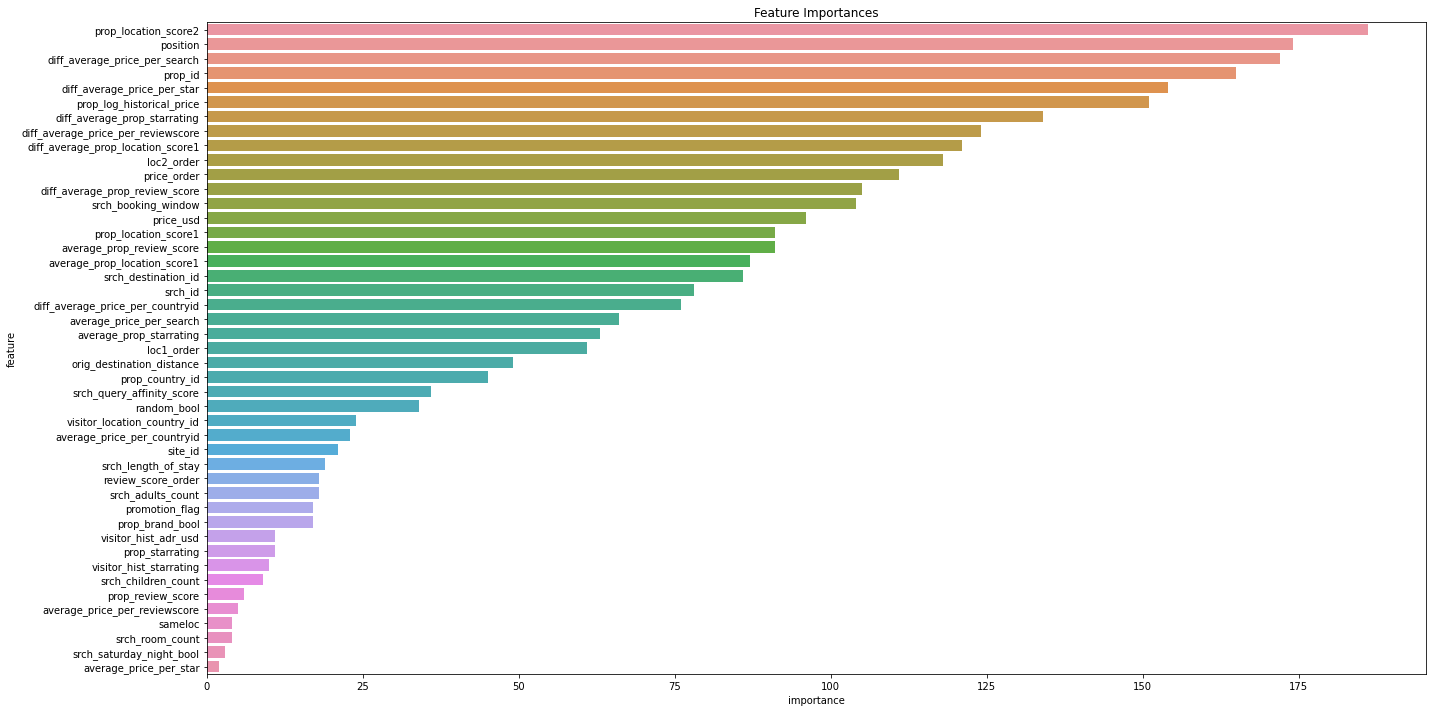

In [573]:
feature_imp = pd.DataFrame(sorted(zip(gbm.feature_importances_,selected)), columns=['importance','feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="importance", y="feature", data=feature_imp.sort_values(by="importance", ascending=False))
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

In [574]:
print(dir(gbm))

['_Booster', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_after_early_stop', '_base_doc', '_before_early_stop', '_best_iteration', '_best_score', '_check_n_features', '_class_map', '_class_weight', '_classes', '_early_stop', '_eval_at', '_evals_result', '_fobj', '_get_param_names', '_get_tags', '_more_tags', '_n_classes', '_n_features', '_n_features_in', '_objective', '_other_params', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_validate_data', 'best_iteration_', 'best_score_', 'booster_', 'boosting_type', 'class_weight', 'colsample_bytree', 'evals_result_', 'feature_importances_', 'feature_name_', 'fit', 'fitted_', 'get_params', 'importance_type

In [576]:
import inspect

In [744]:
from sklearn.model_selection import GridSearchCV

In [579]:
print(inspect.signature(gbm.fit))

(X, y, sample_weight=None, init_score=None, group=None, eval_set=None, eval_names=None, eval_sample_weight=None, eval_init_score=None, eval_group=None, eval_metric=None, eval_at=(1, 2, 3, 4, 5), early_stopping_rounds=None, verbose=True, feature_name='auto', categorical_feature='auto', callbacks=None, init_model=None)


In [778]:
ndcg_scorer

make_scorer(ndcg_score, needs_proba=True, k=5)

In [787]:
# from sklearn.model_selection import RandomizedSearchCV
# import lightgbm as lgb
# import numpy as np
# import pandas as pd
# ngrid=2
# ranking_param_grid = {

#     'learning_rate': learning_rate,
#    'n_estimators': n_estimators,
#      'num_leaves':num_leaves,
#     'max_depth': max_depth,

#     'boosting_type': ['dart'],
#     'objective': ['lambdarank'],
#     'max_bin':max_bin
# }

# groups = x_train["srch_id"].value_counts(sort=False).sort_index()
# eval_groups = x_val["srch_id"].value_counts(sort=False).sort_index()
# gridsearch = RandomizedSearchCV(gbm,param_distributions=ranking_param_grid,n_jobs=-1)

In [635]:
gbm.get_params().keys()

dict_keys(['boosting_type', 'class_weight', 'colsample_bytree', 'importance_type', 'learning_rate', 'max_depth', 'min_child_samples', 'min_child_weight', 'min_split_gain', 'n_estimators', 'n_jobs', 'num_leaves', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'silent', 'subsample', 'subsample_for_bin', 'subsample_freq'])

In [651]:
len(x_val)

34993

In [789]:
gbm = lgbm.LGBMRanker(objective='lambdarank',class_weight='balanced')

num_leaves. This is the main parameter to control the complexity of the tree model. Theoretically, we can set num_leaves = 2^(max_depth) to obtain the same number of leaves as depth-wise tree. However, this simple conversion is not good in practice. The reason is that a leaf-wise tree is typically much deeper than a depth-wise tree for a fixed number of leaves. Unconstrained depth can induce over-fitting. Thus, when trying to tune the num_leaves, we should let it be smaller than 2^(max_depth). For example, when the max_depth=7 the depth-wise tree can get good accuracy, but setting num_leaves to 127 may cause over-fitting, and setting it to 70 or 80 may get better accuracy than depth-wise.
min_data_in_leaf. This is a very important parameter to prevent over-fitting in a leaf-wise tree. Its optimal value depends on the number of training samples and num_leaves. Setting it to a large value can avoid growing too deep a tree, but may cause under-fitting. In practice, setting it to hundreds or thousands is enough for a large dataset.
max_depth. You also can use max_depth to limit the tree depth explicitly.

In [ ]:
#reduce max dept to reduce training time
# decrease num leave training time
# num_iteration
#early stopping round

better accuracy:
    large max bin, small learning rate with large num iteration, large num leaves,darr
    
    

deal overfit:small max bin, small num leaves, bagging, feature fraction, lambda l1, max depth

In [807]:
np.logspace(-2,0,50)

array([0.01      , 0.01098541, 0.01206793, 0.01325711, 0.01456348,
       0.01599859, 0.01757511, 0.01930698, 0.02120951, 0.02329952,
       0.02559548, 0.02811769, 0.03088844, 0.03393222, 0.03727594,
       0.04094915, 0.04498433, 0.04941713, 0.05428675, 0.05963623,
       0.06551286, 0.07196857, 0.07906043, 0.08685114, 0.09540955,
       0.10481131, 0.11513954, 0.12648552, 0.13894955, 0.1526418 ,
       0.16768329, 0.184207  , 0.20235896, 0.22229965, 0.24420531,
       0.26826958, 0.29470517, 0.32374575, 0.35564803, 0.39069399,
       0.42919343, 0.47148664, 0.51794747, 0.5689866 , 0.62505519,
       0.68664885, 0.75431201, 0.82864277, 0.91029818, 1.        ])

In [2]:
learning_rate = np.arange(0,2,0.01)
num_leaves=np.arange(1,10)
max_depth= np.arange(1, )
n_estimators= np.arange(500,3000,500)
max_bin=np.arange(50,500,50)
#reg_alpha = np.logspace(-2,0,50)

NameError: name 'np' is not defined

In [813]:
ranking_param_grid = {

    'learning_rate': learning_rate,
   'n_estimators': n_estimators,
     'num_leaves':num_leaves,
    'max_depth': max_depth,
    'boosting_type': ['dart','gbdt'],
    'objective': ['lambdarank'],
    'max_bin':max_bin
}

gridsearch = GridSearchCV(gbm,ranking_param_grid,n_jobs=-1,cv=5,scoring=ndcg_scorer)

In [1]:
ranking_param_grid = {

    'learning_rate': learning_rate
}

gridsearch = GridSearchCV(gbm,ranking_param_grid,n_jobs=-1,cv=5,scoring=ndcg_scorer)

NameError: name 'learning_rate' is not defined

In [812]:
gbm.get_params().keys()

dict_keys(['boosting_type', 'class_weight', 'colsample_bytree', 'importance_type', 'learning_rate', 'max_depth', 'min_child_samples', 'min_child_weight', 'min_split_gain', 'n_estimators', 'n_jobs', 'num_leaves', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'silent', 'subsample', 'subsample_for_bin', 'subsample_freq'])

In [814]:
gridsearch.fit(x_train,y_train,group=groups,eval_set=[(x_train,y_train),(x_val,y_val)],eval_group=[groups, eval_groups],eval_at=5)

KeyboardInterrupt: 

In [682]:
gridsearch.best_params_

{'objective': 'lambdarank',
 'num_leaves': 8,
 'n_estimators': 2500,
 'max_depth': 4,
 'max_bin': 50,
 'learning_rate': 0.2,
 'boosting_type': 'dart'}

In [791]:
bestgbm = lgbm.LGBMRanker(**gridsearch.best_params_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [790]:
gbm.fit(x_train,y_train,group=groups,eval_set=[(x_train,y_train),(x_val,y_val)],eval_group=[groups, eval_groups],eval_at=5)

[1]	training's ndcg@5: 0.286382	valid_1's ndcg@5: 0.245457
[2]	training's ndcg@5: 0.371766	valid_1's ndcg@5: 0.334613
[3]	training's ndcg@5: 0.378786	valid_1's ndcg@5: 0.33655
[4]	training's ndcg@5: 0.38271	valid_1's ndcg@5: 0.337014
[5]	training's ndcg@5: 0.389211	valid_1's ndcg@5: 0.338361
[6]	training's ndcg@5: 0.382992	valid_1's ndcg@5: 0.330081
[7]	training's ndcg@5: 0.403236	valid_1's ndcg@5: 0.353719
[8]	training's ndcg@5: 0.414466	valid_1's ndcg@5: 0.357941
[9]	training's ndcg@5: 0.418535	valid_1's ndcg@5: 0.368602
[10]	training's ndcg@5: 0.424112	valid_1's ndcg@5: 0.368485
[11]	training's ndcg@5: 0.429186	valid_1's ndcg@5: 0.365084
[12]	training's ndcg@5: 0.433409	valid_1's ndcg@5: 0.36635
[13]	training's ndcg@5: 0.434952	valid_1's ndcg@5: 0.366035
[14]	training's ndcg@5: 0.437236	valid_1's ndcg@5: 0.363734
[15]	training's ndcg@5: 0.437805	valid_1's ndcg@5: 0.36429
[16]	training's ndcg@5: 0.442536	valid_1's ndcg@5: 0.362802
[17]	training's ndcg@5: 0.444125	valid_1's ndcg@5: 0.

LGBMRanker(class_weight='balanced', objective='lambdarank')

In [703]:
bestgbm.fit(x_train,y_train,group=groups,eval_set=[(x_train,y_train),(x_val,y_val)],eval_group=[groups, eval_groups],eval_at=5)

[1]	training's ndcg@5: 0.333992	valid_1's ndcg@5: 0.335853
[2]	training's ndcg@5: 0.37594	valid_1's ndcg@5: 0.373366
[3]	training's ndcg@5: 0.380416	valid_1's ndcg@5: 0.384709
[4]	training's ndcg@5: 0.384923	valid_1's ndcg@5: 0.385311
[5]	training's ndcg@5: 0.385407	valid_1's ndcg@5: 0.388939
[6]	training's ndcg@5: 0.387275	valid_1's ndcg@5: 0.391063
[7]	training's ndcg@5: 0.389451	valid_1's ndcg@5: 0.389
[8]	training's ndcg@5: 0.390156	valid_1's ndcg@5: 0.391429
[9]	training's ndcg@5: 0.391398	valid_1's ndcg@5: 0.392616
[10]	training's ndcg@5: 0.394565	valid_1's ndcg@5: 0.394494
[11]	training's ndcg@5: 0.395621	valid_1's ndcg@5: 0.397364
[12]	training's ndcg@5: 0.39609	valid_1's ndcg@5: 0.398272
[13]	training's ndcg@5: 0.397217	valid_1's ndcg@5: 0.399231
[14]	training's ndcg@5: 0.399449	valid_1's ndcg@5: 0.398949
[15]	training's ndcg@5: 0.401122	valid_1's ndcg@5: 0.402395
[16]	training's ndcg@5: 0.40394	valid_1's ndcg@5: 0.402253
[17]	training's ndcg@5: 0.405242	valid_1's ndcg@5: 0.40

[146]	training's ndcg@5: 0.444555	valid_1's ndcg@5: 0.417633
[147]	training's ndcg@5: 0.444446	valid_1's ndcg@5: 0.418637
[148]	training's ndcg@5: 0.444632	valid_1's ndcg@5: 0.41858
[149]	training's ndcg@5: 0.444925	valid_1's ndcg@5: 0.418978
[150]	training's ndcg@5: 0.44504	valid_1's ndcg@5: 0.418691
[151]	training's ndcg@5: 0.444985	valid_1's ndcg@5: 0.419308
[152]	training's ndcg@5: 0.445016	valid_1's ndcg@5: 0.419771
[153]	training's ndcg@5: 0.445223	valid_1's ndcg@5: 0.41848
[154]	training's ndcg@5: 0.445158	valid_1's ndcg@5: 0.41809
[155]	training's ndcg@5: 0.445776	valid_1's ndcg@5: 0.41938
[156]	training's ndcg@5: 0.445699	valid_1's ndcg@5: 0.418681
[157]	training's ndcg@5: 0.445913	valid_1's ndcg@5: 0.419039
[158]	training's ndcg@5: 0.445802	valid_1's ndcg@5: 0.419051
[159]	training's ndcg@5: 0.445954	valid_1's ndcg@5: 0.419178
[160]	training's ndcg@5: 0.445587	valid_1's ndcg@5: 0.419308
[161]	training's ndcg@5: 0.445378	valid_1's ndcg@5: 0.41998
[162]	training's ndcg@5: 0.445

[288]	training's ndcg@5: 0.472364	valid_1's ndcg@5: 0.415966
[289]	training's ndcg@5: 0.472944	valid_1's ndcg@5: 0.414987
[290]	training's ndcg@5: 0.473688	valid_1's ndcg@5: 0.414405
[291]	training's ndcg@5: 0.473613	valid_1's ndcg@5: 0.413823
[292]	training's ndcg@5: 0.473609	valid_1's ndcg@5: 0.413328
[293]	training's ndcg@5: 0.473505	valid_1's ndcg@5: 0.413928
[294]	training's ndcg@5: 0.474126	valid_1's ndcg@5: 0.413586
[295]	training's ndcg@5: 0.474353	valid_1's ndcg@5: 0.414153
[296]	training's ndcg@5: 0.474289	valid_1's ndcg@5: 0.414132
[297]	training's ndcg@5: 0.474834	valid_1's ndcg@5: 0.413994
[298]	training's ndcg@5: 0.474723	valid_1's ndcg@5: 0.414136
[299]	training's ndcg@5: 0.47607	valid_1's ndcg@5: 0.414224
[300]	training's ndcg@5: 0.475703	valid_1's ndcg@5: 0.414973
[301]	training's ndcg@5: 0.475273	valid_1's ndcg@5: 0.414925
[302]	training's ndcg@5: 0.475555	valid_1's ndcg@5: 0.414959
[303]	training's ndcg@5: 0.475519	valid_1's ndcg@5: 0.414868
[304]	training's ndcg@5: 

[425]	training's ndcg@5: 0.501003	valid_1's ndcg@5: 0.410647
[426]	training's ndcg@5: 0.501139	valid_1's ndcg@5: 0.410831
[427]	training's ndcg@5: 0.501417	valid_1's ndcg@5: 0.410227
[428]	training's ndcg@5: 0.50163	valid_1's ndcg@5: 0.409655
[429]	training's ndcg@5: 0.501972	valid_1's ndcg@5: 0.411498
[430]	training's ndcg@5: 0.50198	valid_1's ndcg@5: 0.411314
[431]	training's ndcg@5: 0.502114	valid_1's ndcg@5: 0.411603
[432]	training's ndcg@5: 0.502748	valid_1's ndcg@5: 0.41154
[433]	training's ndcg@5: 0.502784	valid_1's ndcg@5: 0.411727
[434]	training's ndcg@5: 0.502587	valid_1's ndcg@5: 0.411719
[435]	training's ndcg@5: 0.50238	valid_1's ndcg@5: 0.411155
[436]	training's ndcg@5: 0.502743	valid_1's ndcg@5: 0.410888
[437]	training's ndcg@5: 0.50304	valid_1's ndcg@5: 0.410602
[438]	training's ndcg@5: 0.502906	valid_1's ndcg@5: 0.411076
[439]	training's ndcg@5: 0.5029	valid_1's ndcg@5: 0.411136
[440]	training's ndcg@5: 0.503113	valid_1's ndcg@5: 0.410662
[441]	training's ndcg@5: 0.5033

[561]	training's ndcg@5: 0.52835	valid_1's ndcg@5: 0.412013
[562]	training's ndcg@5: 0.528386	valid_1's ndcg@5: 0.411953
[563]	training's ndcg@5: 0.528116	valid_1's ndcg@5: 0.412092
[564]	training's ndcg@5: 0.528061	valid_1's ndcg@5: 0.412196
[565]	training's ndcg@5: 0.528545	valid_1's ndcg@5: 0.412447
[566]	training's ndcg@5: 0.529098	valid_1's ndcg@5: 0.412514
[567]	training's ndcg@5: 0.53005	valid_1's ndcg@5: 0.411738
[568]	training's ndcg@5: 0.530006	valid_1's ndcg@5: 0.412084
[569]	training's ndcg@5: 0.529612	valid_1's ndcg@5: 0.411852
[570]	training's ndcg@5: 0.529852	valid_1's ndcg@5: 0.411774
[571]	training's ndcg@5: 0.529996	valid_1's ndcg@5: 0.413069
[572]	training's ndcg@5: 0.530251	valid_1's ndcg@5: 0.412821
[573]	training's ndcg@5: 0.529806	valid_1's ndcg@5: 0.41337
[574]	training's ndcg@5: 0.529768	valid_1's ndcg@5: 0.413132
[575]	training's ndcg@5: 0.53022	valid_1's ndcg@5: 0.413133
[576]	training's ndcg@5: 0.529971	valid_1's ndcg@5: 0.41321
[577]	training's ndcg@5: 0.53

[703]	training's ndcg@5: 0.546012	valid_1's ndcg@5: 0.410585
[704]	training's ndcg@5: 0.546027	valid_1's ndcg@5: 0.410722
[705]	training's ndcg@5: 0.546184	valid_1's ndcg@5: 0.410457
[706]	training's ndcg@5: 0.545842	valid_1's ndcg@5: 0.410045
[707]	training's ndcg@5: 0.545637	valid_1's ndcg@5: 0.41085
[708]	training's ndcg@5: 0.546322	valid_1's ndcg@5: 0.411381
[709]	training's ndcg@5: 0.546698	valid_1's ndcg@5: 0.410699
[710]	training's ndcg@5: 0.546664	valid_1's ndcg@5: 0.409584
[711]	training's ndcg@5: 0.546671	valid_1's ndcg@5: 0.409808
[712]	training's ndcg@5: 0.546501	valid_1's ndcg@5: 0.41018
[713]	training's ndcg@5: 0.546224	valid_1's ndcg@5: 0.409606
[714]	training's ndcg@5: 0.546483	valid_1's ndcg@5: 0.409039
[715]	training's ndcg@5: 0.546691	valid_1's ndcg@5: 0.409408
[716]	training's ndcg@5: 0.547232	valid_1's ndcg@5: 0.409114
[717]	training's ndcg@5: 0.547028	valid_1's ndcg@5: 0.409262
[718]	training's ndcg@5: 0.547023	valid_1's ndcg@5: 0.409244
[719]	training's ndcg@5: 0

[844]	training's ndcg@5: 0.564917	valid_1's ndcg@5: 0.406042
[845]	training's ndcg@5: 0.564952	valid_1's ndcg@5: 0.405804
[846]	training's ndcg@5: 0.565058	valid_1's ndcg@5: 0.405756
[847]	training's ndcg@5: 0.565587	valid_1's ndcg@5: 0.404281
[848]	training's ndcg@5: 0.56546	valid_1's ndcg@5: 0.404338
[849]	training's ndcg@5: 0.565558	valid_1's ndcg@5: 0.404935
[850]	training's ndcg@5: 0.565873	valid_1's ndcg@5: 0.40491
[851]	training's ndcg@5: 0.565753	valid_1's ndcg@5: 0.404637
[852]	training's ndcg@5: 0.565906	valid_1's ndcg@5: 0.403871
[853]	training's ndcg@5: 0.566317	valid_1's ndcg@5: 0.403818
[854]	training's ndcg@5: 0.56635	valid_1's ndcg@5: 0.404105
[855]	training's ndcg@5: 0.566892	valid_1's ndcg@5: 0.403577
[856]	training's ndcg@5: 0.566947	valid_1's ndcg@5: 0.403746
[857]	training's ndcg@5: 0.567067	valid_1's ndcg@5: 0.403436
[858]	training's ndcg@5: 0.566941	valid_1's ndcg@5: 0.403716
[859]	training's ndcg@5: 0.566933	valid_1's ndcg@5: 0.403741
[860]	training's ndcg@5: 0.

[979]	training's ndcg@5: 0.579797	valid_1's ndcg@5: 0.402445
[980]	training's ndcg@5: 0.58016	valid_1's ndcg@5: 0.402657
[981]	training's ndcg@5: 0.580283	valid_1's ndcg@5: 0.403129
[982]	training's ndcg@5: 0.580274	valid_1's ndcg@5: 0.402376
[983]	training's ndcg@5: 0.580626	valid_1's ndcg@5: 0.402012
[984]	training's ndcg@5: 0.580531	valid_1's ndcg@5: 0.402748
[985]	training's ndcg@5: 0.580651	valid_1's ndcg@5: 0.402522
[986]	training's ndcg@5: 0.580755	valid_1's ndcg@5: 0.402481
[987]	training's ndcg@5: 0.580618	valid_1's ndcg@5: 0.402749
[988]	training's ndcg@5: 0.580584	valid_1's ndcg@5: 0.402358
[989]	training's ndcg@5: 0.580749	valid_1's ndcg@5: 0.402133
[990]	training's ndcg@5: 0.58067	valid_1's ndcg@5: 0.402133
[991]	training's ndcg@5: 0.58101	valid_1's ndcg@5: 0.401339
[992]	training's ndcg@5: 0.581067	valid_1's ndcg@5: 0.401577
[993]	training's ndcg@5: 0.580769	valid_1's ndcg@5: 0.401814
[994]	training's ndcg@5: 0.581165	valid_1's ndcg@5: 0.400468
[995]	training's ndcg@5: 0.

[1112]	training's ndcg@5: 0.594951	valid_1's ndcg@5: 0.401204
[1113]	training's ndcg@5: 0.594803	valid_1's ndcg@5: 0.401017
[1114]	training's ndcg@5: 0.594813	valid_1's ndcg@5: 0.400597
[1115]	training's ndcg@5: 0.594954	valid_1's ndcg@5: 0.400073
[1116]	training's ndcg@5: 0.595126	valid_1's ndcg@5: 0.399818
[1117]	training's ndcg@5: 0.594998	valid_1's ndcg@5: 0.399757
[1118]	training's ndcg@5: 0.59523	valid_1's ndcg@5: 0.400239
[1119]	training's ndcg@5: 0.595172	valid_1's ndcg@5: 0.400272
[1120]	training's ndcg@5: 0.59504	valid_1's ndcg@5: 0.400272
[1121]	training's ndcg@5: 0.595752	valid_1's ndcg@5: 0.401252
[1122]	training's ndcg@5: 0.595202	valid_1's ndcg@5: 0.401714
[1123]	training's ndcg@5: 0.595684	valid_1's ndcg@5: 0.401582
[1124]	training's ndcg@5: 0.595997	valid_1's ndcg@5: 0.401721
[1125]	training's ndcg@5: 0.59651	valid_1's ndcg@5: 0.400843
[1126]	training's ndcg@5: 0.596761	valid_1's ndcg@5: 0.401263
[1127]	training's ndcg@5: 0.596644	valid_1's ndcg@5: 0.400964
[1128]	trai

[1247]	training's ndcg@5: 0.609156	valid_1's ndcg@5: 0.401198
[1248]	training's ndcg@5: 0.609196	valid_1's ndcg@5: 0.401181
[1249]	training's ndcg@5: 0.609234	valid_1's ndcg@5: 0.401505
[1250]	training's ndcg@5: 0.609794	valid_1's ndcg@5: 0.402028
[1251]	training's ndcg@5: 0.610264	valid_1's ndcg@5: 0.401363
[1252]	training's ndcg@5: 0.609996	valid_1's ndcg@5: 0.400541
[1253]	training's ndcg@5: 0.609888	valid_1's ndcg@5: 0.400651
[1254]	training's ndcg@5: 0.610103	valid_1's ndcg@5: 0.40009
[1255]	training's ndcg@5: 0.610372	valid_1's ndcg@5: 0.400938
[1256]	training's ndcg@5: 0.610353	valid_1's ndcg@5: 0.401116
[1257]	training's ndcg@5: 0.610723	valid_1's ndcg@5: 0.400856
[1258]	training's ndcg@5: 0.61065	valid_1's ndcg@5: 0.400959
[1259]	training's ndcg@5: 0.611217	valid_1's ndcg@5: 0.401032
[1260]	training's ndcg@5: 0.611162	valid_1's ndcg@5: 0.401482
[1261]	training's ndcg@5: 0.611347	valid_1's ndcg@5: 0.401469
[1262]	training's ndcg@5: 0.611318	valid_1's ndcg@5: 0.400898
[1263]	tra

[1380]	training's ndcg@5: 0.62688	valid_1's ndcg@5: 0.402721
[1381]	training's ndcg@5: 0.627173	valid_1's ndcg@5: 0.403018
[1382]	training's ndcg@5: 0.627001	valid_1's ndcg@5: 0.402635
[1383]	training's ndcg@5: 0.627011	valid_1's ndcg@5: 0.402727
[1384]	training's ndcg@5: 0.62708	valid_1's ndcg@5: 0.403086
[1385]	training's ndcg@5: 0.627145	valid_1's ndcg@5: 0.402875
[1386]	training's ndcg@5: 0.627065	valid_1's ndcg@5: 0.402526
[1387]	training's ndcg@5: 0.627272	valid_1's ndcg@5: 0.402509
[1388]	training's ndcg@5: 0.627704	valid_1's ndcg@5: 0.402524
[1389]	training's ndcg@5: 0.627695	valid_1's ndcg@5: 0.402495
[1390]	training's ndcg@5: 0.627986	valid_1's ndcg@5: 0.403407
[1391]	training's ndcg@5: 0.628014	valid_1's ndcg@5: 0.403637
[1392]	training's ndcg@5: 0.628128	valid_1's ndcg@5: 0.403853
[1393]	training's ndcg@5: 0.62817	valid_1's ndcg@5: 0.404124
[1394]	training's ndcg@5: 0.628144	valid_1's ndcg@5: 0.404184
[1395]	training's ndcg@5: 0.628694	valid_1's ndcg@5: 0.403485
[1396]	trai

[1513]	training's ndcg@5: 0.637436	valid_1's ndcg@5: 0.403812
[1514]	training's ndcg@5: 0.637581	valid_1's ndcg@5: 0.404336
[1515]	training's ndcg@5: 0.63749	valid_1's ndcg@5: 0.404367
[1516]	training's ndcg@5: 0.637388	valid_1's ndcg@5: 0.404099
[1517]	training's ndcg@5: 0.637519	valid_1's ndcg@5: 0.404098
[1518]	training's ndcg@5: 0.637679	valid_1's ndcg@5: 0.404279
[1519]	training's ndcg@5: 0.637549	valid_1's ndcg@5: 0.404517
[1520]	training's ndcg@5: 0.638065	valid_1's ndcg@5: 0.404758
[1521]	training's ndcg@5: 0.63809	valid_1's ndcg@5: 0.4034
[1522]	training's ndcg@5: 0.637884	valid_1's ndcg@5: 0.403633
[1523]	training's ndcg@5: 0.637892	valid_1's ndcg@5: 0.403939
[1524]	training's ndcg@5: 0.638097	valid_1's ndcg@5: 0.403891
[1525]	training's ndcg@5: 0.638155	valid_1's ndcg@5: 0.404146
[1526]	training's ndcg@5: 0.638202	valid_1's ndcg@5: 0.404486
[1527]	training's ndcg@5: 0.638363	valid_1's ndcg@5: 0.4051
[1528]	training's ndcg@5: 0.638416	valid_1's ndcg@5: 0.405269
[1529]	trainin

[1647]	training's ndcg@5: 0.651135	valid_1's ndcg@5: 0.404771
[1648]	training's ndcg@5: 0.651125	valid_1's ndcg@5: 0.404818
[1649]	training's ndcg@5: 0.65124	valid_1's ndcg@5: 0.404747
[1650]	training's ndcg@5: 0.651266	valid_1's ndcg@5: 0.405409
[1651]	training's ndcg@5: 0.651437	valid_1's ndcg@5: 0.405172
[1652]	training's ndcg@5: 0.651418	valid_1's ndcg@5: 0.404671
[1653]	training's ndcg@5: 0.651949	valid_1's ndcg@5: 0.402825
[1654]	training's ndcg@5: 0.65162	valid_1's ndcg@5: 0.403407
[1655]	training's ndcg@5: 0.651734	valid_1's ndcg@5: 0.403408
[1656]	training's ndcg@5: 0.652019	valid_1's ndcg@5: 0.402757
[1657]	training's ndcg@5: 0.651819	valid_1's ndcg@5: 0.400911
[1658]	training's ndcg@5: 0.652019	valid_1's ndcg@5: 0.400959
[1659]	training's ndcg@5: 0.652331	valid_1's ndcg@5: 0.400477
[1660]	training's ndcg@5: 0.65234	valid_1's ndcg@5: 0.401049
[1661]	training's ndcg@5: 0.652171	valid_1's ndcg@5: 0.40078
[1662]	training's ndcg@5: 0.652532	valid_1's ndcg@5: 0.401705
[1663]	train

[1782]	training's ndcg@5: 0.664086	valid_1's ndcg@5: 0.399115
[1783]	training's ndcg@5: 0.664254	valid_1's ndcg@5: 0.398691
[1784]	training's ndcg@5: 0.664763	valid_1's ndcg@5: 0.399548
[1785]	training's ndcg@5: 0.664788	valid_1's ndcg@5: 0.400042
[1786]	training's ndcg@5: 0.664648	valid_1's ndcg@5: 0.399919
[1787]	training's ndcg@5: 0.665463	valid_1's ndcg@5: 0.399021
[1788]	training's ndcg@5: 0.665996	valid_1's ndcg@5: 0.398265
[1789]	training's ndcg@5: 0.665905	valid_1's ndcg@5: 0.398222
[1790]	training's ndcg@5: 0.666166	valid_1's ndcg@5: 0.397821
[1791]	training's ndcg@5: 0.666112	valid_1's ndcg@5: 0.397838
[1792]	training's ndcg@5: 0.666291	valid_1's ndcg@5: 0.397487
[1793]	training's ndcg@5: 0.666171	valid_1's ndcg@5: 0.397231
[1794]	training's ndcg@5: 0.66604	valid_1's ndcg@5: 0.397322
[1795]	training's ndcg@5: 0.666186	valid_1's ndcg@5: 0.397221
[1796]	training's ndcg@5: 0.666307	valid_1's ndcg@5: 0.397489
[1797]	training's ndcg@5: 0.666214	valid_1's ndcg@5: 0.397805
[1798]	tr

[1916]	training's ndcg@5: 0.676752	valid_1's ndcg@5: 0.397163
[1917]	training's ndcg@5: 0.677067	valid_1's ndcg@5: 0.398538
[1918]	training's ndcg@5: 0.677189	valid_1's ndcg@5: 0.398131
[1919]	training's ndcg@5: 0.677114	valid_1's ndcg@5: 0.398447
[1920]	training's ndcg@5: 0.677139	valid_1's ndcg@5: 0.398538
[1921]	training's ndcg@5: 0.677185	valid_1's ndcg@5: 0.398539
[1922]	training's ndcg@5: 0.677466	valid_1's ndcg@5: 0.398673
[1923]	training's ndcg@5: 0.677689	valid_1's ndcg@5: 0.397605
[1924]	training's ndcg@5: 0.677897	valid_1's ndcg@5: 0.397337
[1925]	training's ndcg@5: 0.677878	valid_1's ndcg@5: 0.397605
[1926]	training's ndcg@5: 0.677503	valid_1's ndcg@5: 0.397555
[1927]	training's ndcg@5: 0.677584	valid_1's ndcg@5: 0.397603
[1928]	training's ndcg@5: 0.677462	valid_1's ndcg@5: 0.397603
[1929]	training's ndcg@5: 0.677485	valid_1's ndcg@5: 0.397349
[1930]	training's ndcg@5: 0.678466	valid_1's ndcg@5: 0.39666
[1931]	training's ndcg@5: 0.678616	valid_1's ndcg@5: 0.39595
[1932]	tra

[2056]	training's ndcg@5: 0.690161	valid_1's ndcg@5: 0.390414
[2057]	training's ndcg@5: 0.690133	valid_1's ndcg@5: 0.390256
[2058]	training's ndcg@5: 0.690113	valid_1's ndcg@5: 0.389793
[2059]	training's ndcg@5: 0.690513	valid_1's ndcg@5: 0.389884
[2060]	training's ndcg@5: 0.69063	valid_1's ndcg@5: 0.389658
[2061]	training's ndcg@5: 0.690628	valid_1's ndcg@5: 0.389914
[2062]	training's ndcg@5: 0.690688	valid_1's ndcg@5: 0.390167
[2063]	training's ndcg@5: 0.690663	valid_1's ndcg@5: 0.39015
[2064]	training's ndcg@5: 0.690736	valid_1's ndcg@5: 0.390206
[2065]	training's ndcg@5: 0.690545	valid_1's ndcg@5: 0.390023
[2066]	training's ndcg@5: 0.69069	valid_1's ndcg@5: 0.390659
[2067]	training's ndcg@5: 0.69066	valid_1's ndcg@5: 0.390019
[2068]	training's ndcg@5: 0.690733	valid_1's ndcg@5: 0.390019
[2069]	training's ndcg@5: 0.69068	valid_1's ndcg@5: 0.389958
[2070]	training's ndcg@5: 0.690728	valid_1's ndcg@5: 0.389941
[2071]	training's ndcg@5: 0.691228	valid_1's ndcg@5: 0.389963
[2072]	traini

[2194]	training's ndcg@5: 0.705695	valid_1's ndcg@5: 0.389711
[2195]	training's ndcg@5: 0.705815	valid_1's ndcg@5: 0.389633
[2196]	training's ndcg@5: 0.705606	valid_1's ndcg@5: 0.389953
[2197]	training's ndcg@5: 0.705603	valid_1's ndcg@5: 0.39001
[2198]	training's ndcg@5: 0.705604	valid_1's ndcg@5: 0.391003
[2199]	training's ndcg@5: 0.705661	valid_1's ndcg@5: 0.390298
[2200]	training's ndcg@5: 0.705969	valid_1's ndcg@5: 0.39116
[2201]	training's ndcg@5: 0.706044	valid_1's ndcg@5: 0.391082
[2202]	training's ndcg@5: 0.706181	valid_1's ndcg@5: 0.391141
[2203]	training's ndcg@5: 0.706119	valid_1's ndcg@5: 0.390623
[2204]	training's ndcg@5: 0.706234	valid_1's ndcg@5: 0.390385
[2205]	training's ndcg@5: 0.706248	valid_1's ndcg@5: 0.390307
[2206]	training's ndcg@5: 0.706367	valid_1's ndcg@5: 0.390179
[2207]	training's ndcg@5: 0.706439	valid_1's ndcg@5: 0.390193
[2208]	training's ndcg@5: 0.706382	valid_1's ndcg@5: 0.390415
[2209]	training's ndcg@5: 0.706415	valid_1's ndcg@5: 0.390745
[2210]	tra

[2330]	training's ndcg@5: 0.722001	valid_1's ndcg@5: 0.390877
[2331]	training's ndcg@5: 0.721722	valid_1's ndcg@5: 0.390275
[2332]	training's ndcg@5: 0.72162	valid_1's ndcg@5: 0.390634
[2333]	training's ndcg@5: 0.721738	valid_1's ndcg@5: 0.390669
[2334]	training's ndcg@5: 0.72196	valid_1's ndcg@5: 0.3904
[2335]	training's ndcg@5: 0.721758	valid_1's ndcg@5: 0.390808
[2336]	training's ndcg@5: 0.721853	valid_1's ndcg@5: 0.390812
[2337]	training's ndcg@5: 0.722324	valid_1's ndcg@5: 0.390681
[2338]	training's ndcg@5: 0.722232	valid_1's ndcg@5: 0.390575
[2339]	training's ndcg@5: 0.722324	valid_1's ndcg@5: 0.390227
[2340]	training's ndcg@5: 0.722324	valid_1's ndcg@5: 0.390276
[2341]	training's ndcg@5: 0.722535	valid_1's ndcg@5: 0.390111
[2342]	training's ndcg@5: 0.722468	valid_1's ndcg@5: 0.389971
[2343]	training's ndcg@5: 0.722678	valid_1's ndcg@5: 0.390487
[2344]	training's ndcg@5: 0.722797	valid_1's ndcg@5: 0.389911
[2345]	training's ndcg@5: 0.722871	valid_1's ndcg@5: 0.389513
[2346]	train

[2468]	training's ndcg@5: 0.737489	valid_1's ndcg@5: 0.386636
[2469]	training's ndcg@5: 0.737519	valid_1's ndcg@5: 0.386112
[2470]	training's ndcg@5: 0.737519	valid_1's ndcg@5: 0.386112
[2471]	training's ndcg@5: 0.737407	valid_1's ndcg@5: 0.386727
[2472]	training's ndcg@5: 0.737486	valid_1's ndcg@5: 0.386471
[2473]	training's ndcg@5: 0.737499	valid_1's ndcg@5: 0.386739
[2474]	training's ndcg@5: 0.737745	valid_1's ndcg@5: 0.387227
[2475]	training's ndcg@5: 0.737869	valid_1's ndcg@5: 0.38753
[2476]	training's ndcg@5: 0.737907	valid_1's ndcg@5: 0.386992
[2477]	training's ndcg@5: 0.73823	valid_1's ndcg@5: 0.386903
[2478]	training's ndcg@5: 0.738193	valid_1's ndcg@5: 0.387076
[2479]	training's ndcg@5: 0.738123	valid_1's ndcg@5: 0.386943
[2480]	training's ndcg@5: 0.738192	valid_1's ndcg@5: 0.387199
[2481]	training's ndcg@5: 0.73818	valid_1's ndcg@5: 0.387199
[2482]	training's ndcg@5: 0.738167	valid_1's ndcg@5: 0.386908
[2483]	training's ndcg@5: 0.738171	valid_1's ndcg@5: 0.386895
[2484]	trai

LGBMRanker(boosting_type='dart', learning_rate=0.2, max_bin=50, max_depth=4,
           n_estimators=2500, num_leaves=8, objective='lambdarank')

In [770]:
ranking_param_grid = {

    'learning_rate': learning_rate,
   'n_estimators': n_estimators,
     'num_leaves':num_leaves,
    'max_depth': max_depth,

    'boosting_type': ['dart'],
    'objective': ['lambdarank'],
    'max_bin':max_bin
}

randomsearch = RandomizedSearchCV(gbm,ranking_param_grid,n_jobs=-1,cv=3)

In [771]:
randomsearch.fit(x_train,y_train,group=groups,eval_set=[(x_train,y_train),(x_val,y_val)],eval_group=[groups, eval_groups],eval_at=5)

TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator LGBMRanker(objective='lambdarank') does not.

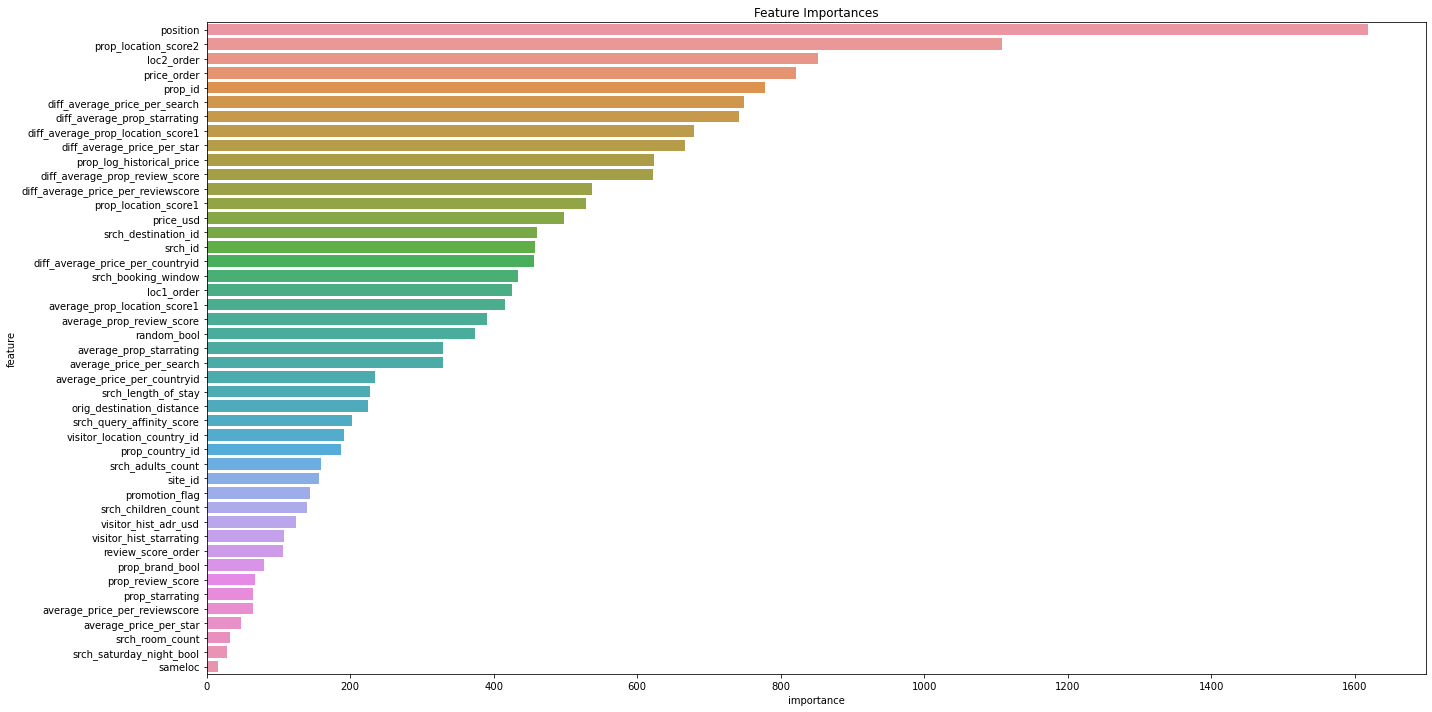

In [714]:
feature_imp = pd.DataFrame(sorted(zip(bestgbm.feature_importances_,selected)), columns=['importance','feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="importance", y="feature", data=feature_imp.sort_values(by="importance", ascending=False))
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

In [710]:
selected

['position',
 'srch_id',
 'site_id',
 'visitor_location_country_id',
 'visitor_hist_starrating',
 'visitor_hist_adr_usd',
 'prop_country_id',
 'prop_id',
 'prop_starrating',
 'prop_review_score',
 'prop_brand_bool',
 'prop_location_score1',
 'prop_location_score2',
 'prop_log_historical_price',
 'price_usd',
 'promotion_flag',
 'srch_destination_id',
 'srch_length_of_stay',
 'srch_booking_window',
 'srch_adults_count',
 'srch_children_count',
 'srch_room_count',
 'srch_saturday_night_bool',
 'srch_query_affinity_score',
 'orig_destination_distance',
 'random_bool',
 'price_order',
 'review_score_order',
 'loc1_order',
 'loc2_order',
 'average_price_per_star',
 'diff_average_price_per_star',
 'average_price_per_reviewscore',
 'diff_average_price_per_reviewscore',
 'average_price_per_countryid',
 'diff_average_price_per_countryid',
 'average_price_per_search',
 'diff_average_price_per_search',
 'average_prop_review_score',
 'diff_average_prop_review_score',
 'average_prop_starrating',
 '

In [704]:
selected2 = selected
test_df_features = test.loc[:,selected]

In [705]:
len(selected)

45

In [706]:
result = bestgbm.predict(test_df_features)
submission = pd.DataFrame({'srch_id':test.srch_id,'prop_id':test.prop_id,'result':result})

In [707]:
submission = submission.sort_values(by=['srch_id', 'result'],ascending=False)

In [708]:
submission = submission.drop(columns='result')

In [709]:
submission.to_csv('/Users/bagusariyono/Downloads/submission_lightgbm_withpos_tuning.csv', index=False)